###**Name:** Ben McGahee

###**Date:** 6/16/2024

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
#Import libraries for reading and manipulating data
import numpy as np
import pandas as pd

#Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Import library to split dataset and tune decision tree models
from sklearn.model_selection import train_test_split, GridSearchCV

#Import library to build and plot decision tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Import library to get different metric scores
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score

#Import warnings and set to "ignore"
import warnings
warnings.filterwarnings('ignore')

#Set limit for number of displayed rows
pd.set_option('display.max_rows', 100)

#Set no limit for number of displayed columns
pd.set_option('display.max_columns', None)

## Loading the dataset

In [ ]:
#Access Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Read the Loan Modelling dataset
data = pd.read_csv('/content/drive/MyDrive/Data/Loan_Modelling.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Make a copy, so the original dataset is not affected
loan = data.copy()

## Data Overview

###Get a preview of the dataset

In [ ]:
#View the first 5 rows of the data
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#View the last 5 rows of the data
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


###Understand shape of the data

In [ ]:
#Use shape attribute to find number of rows and columns
loan.shape

(5000, 14)


The dataset has 5,000 rows and 14 columns

###Get the data types of each column

In [ ]:
#Use info function to get the column names, count of non-null values, and their data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All of the columns have numerical data types
* Most of the columns have a data type of 64 bit integer
* CCAvg is the only column that has a data type of 64 bit float
* ID and ZIPCode are identifiers, which makes them categorical features

###Check Duplicates

In [ ]:
#Use duplicated and sum functions to find total number of duplicate records
loan.duplicated().sum()

0

There are no duplicates

###Check for missing values in the data

In [ ]:
#Use the isnull and sum function to find total number of missing values for each column
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values

###Check Unique Values

In [ ]:
#Get the list of features
features = loan.columns

#Loop through each feature and print their unique values
for feature in features:
  print(f'{feature}:', loan[feature].unique())
  print('---------------------------------------------------------------')
  print('')

ID: [   1    2    3 ... 4998 4999 5000]
---------------------------------------------------------------

Age: [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
---------------------------------------------------------------

Experience: [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
---------------------------------------------------------------

Income: [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99

###**Observations:**
* Most of the features appear to have reasonable values
  * No negative amounts for Mortgage or Income
  * Age has values that represent a group of adult customers
  * ZIPCode has five digit numbers all starting with 9
* A suspect feature is Experience
  * Contains negative values of -1, -2, and -3
  * These values will need to be replaced with positive values

###View the Statistical Summary

In [ ]:
#Use the describe function and T attribute (transpose) to get a readable view of the summary statistics
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


###**Observations:**
* Columns such as ID and ZIPCode are meaningless in the statistical summary
  * ID is an identifier for the customer
  * ZIPCode is a geographical identifer for the customer
* Experience column has a minimum value of -3 years
  * This value could have been entered by mistake
  * Will replace any negative values with positive values

## Exploratory Data Analysis.

###**Mortgage Distribution**

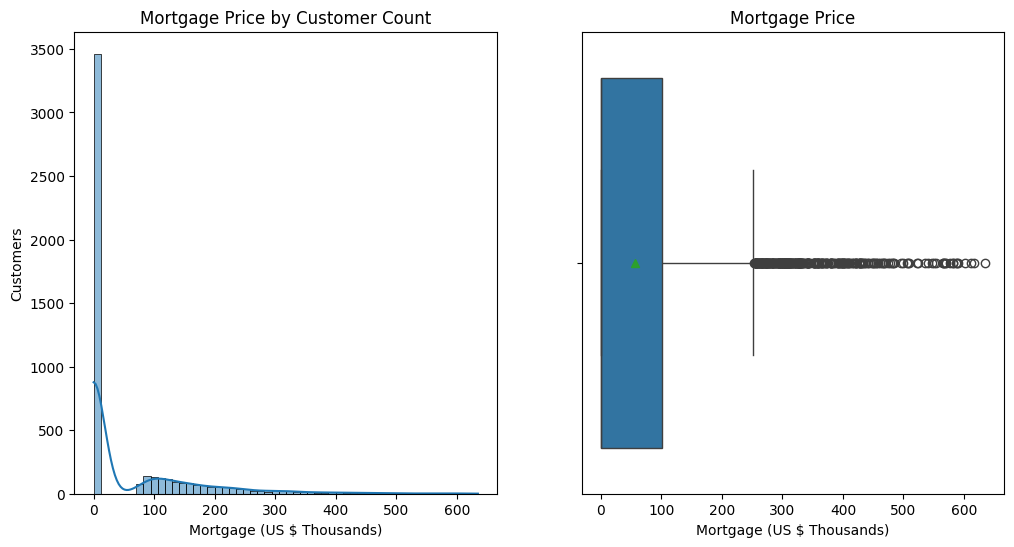

In [ ]:
#Set figure size for histogram and box plot
plt.figure(figsize=(12,6))

#Plot a histogram of Mortgage with KDE
plt.subplot(1,2,1)
sns.histplot(data=loan, x='Mortgage', kde=True)

#Label x and y axes
plt.xlabel('Mortgage (US $ Thousands)')
plt.ylabel('Customers')

#Include title
plt.title('Mortgage Price by Customer Count')

#Plot a boxplot of Mortgage with a green triangle as the mean mortgage value
plt.subplot(1,2,2)
sns.boxplot(data=loan, x='Mortgage', showmeans=True)

#Label x and y axes
plt.xlabel('Mortgage (US $ Thousands)')

#Include title
plt.title('Mortgage Price')

plt.show()

In [ ]:
#Get the mean, median, and mode mortgage values
loan['Mortgage'].mean(), loan['Mortgage'].median(), loan['Mortgage'].mode()

(56.4988,
 0.0,
 0    0
 Name: Mortgage, dtype: int64)

In [ ]:
#Find number of customers who have a mortgage greater than $252,500
len(loan[loan['Mortgage'] > 252.5])

291

###**Observations:**
* Mortgage is a heavily right-skewed distribution based on the histogram and box plots
  * Median / Mode mortgage values are \$0
  * Mean mortgage value is about \$56,498.80
* Analysis of the box plot shows that:
  * First Quartile Q1: \$0
  * Third Quartile Q3: \$101,000
  * Upper Fence/Whisker: Q3 + 1.5 * IQR = \$252,500
* Outliers exist in the Mortgage distribution
  * Any customers having a mortgage greater than \$252,500 would be considered an outlier
  * 291 customers (5.82% of customer base) have mortgages over this amount
  * Will need to investigate the outliers to determine if any treatment is needed

###Check income of mortgage outliers

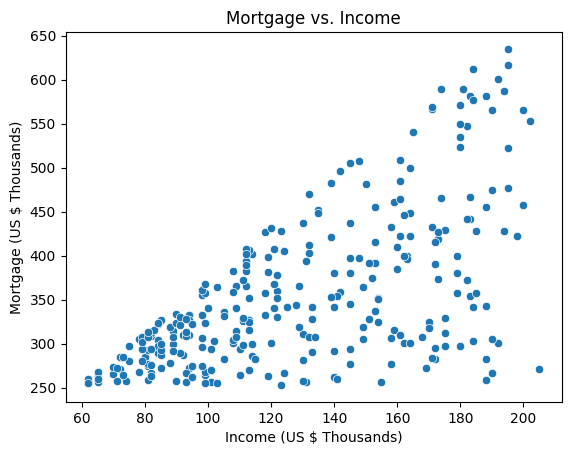

In [ ]:
#Filter dataframe to get the outliers
outliers = loan[loan['Mortgage'] > 252.5]

#Create a scatter plot of Mortgage vs. Income
sns.scatterplot(data=outliers, x='Income', y='Mortgage')

#Label x and y axes
plt.xlabel('Income (US $ Thousands)')
plt.ylabel('Mortgage (US $ Thousands)')

#Include title
plt.title('Mortgage vs. Income')

plt.show()

* The scatter plot depicts a positive correlation between Mortgage and Income
* We can check the correlation coefficient between the two features

### Correlation Matrix - Mortgage and Income

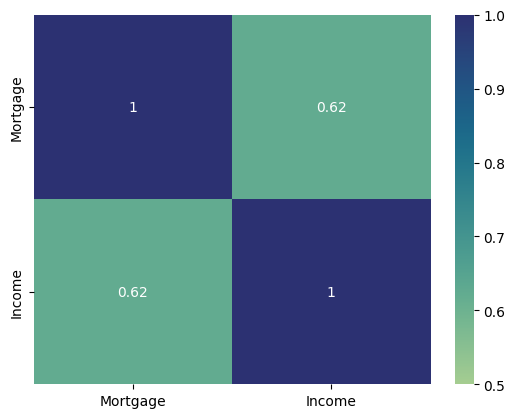

In [ ]:
#View only the Mortgage and Income features in the outliers dataframe
mortgage_income = outliers[['Mortgage', 'Income']]

#Plot heatmap of correlation matrix
sns.heatmap(mortgage_income.corr(), annot=True, vmin=0.5, vmax=1.0, cmap='crest')

plt.show()

* Correlation coefficient = 0.62
* Mortgage and Income have a moderate to strong positive correlation
* Customers with higher incomes are likely to purchase more expensive homes

###**Outlier Treatment Decision**
* The scatter plot and correlation matrix show that income can play a factor in mortgage
* Customers with higher incomes may explain the purchase of more expensive homes
* The larger mortgage values appear to be reasonable and are not entered in by mistake
*  Outliers may reveal significant insights later on in our analysis
* For these reasons, we will keep the mortgage outliers in the dataset

###**Number of Credit Card Holders**

In [ ]:
#Filter the CreditCard column with a value of 1 and use len function to see how many customers have a credit card with another bank
len(loan[loan['CreditCard'] == 1])

1470

In [ ]:
#Check the percentage of customers who have credit cards from another bank
#Use the len function to divide total number of customers with a credit card outside of AllLife Bank by total number of customers times 100
len(loan[loan['CreditCard'] == 1]) / len(loan) * 100

29.4

###**Observations:**
* 1,470 customers own a credit card issued by another bank
* 29.4% of the customer base are in this group

###**Correlation Between Features and Personal Loan (Target)**

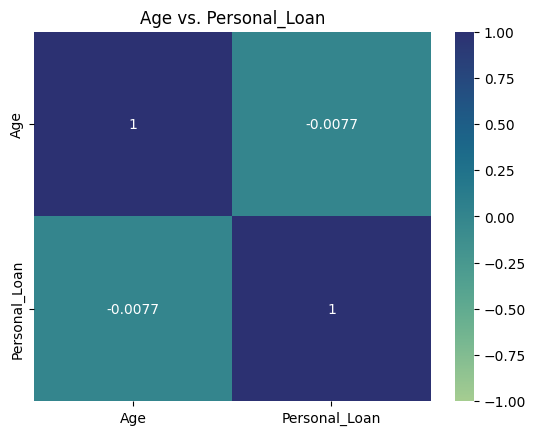

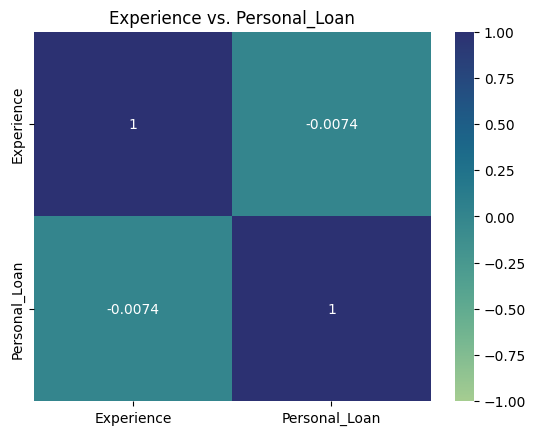

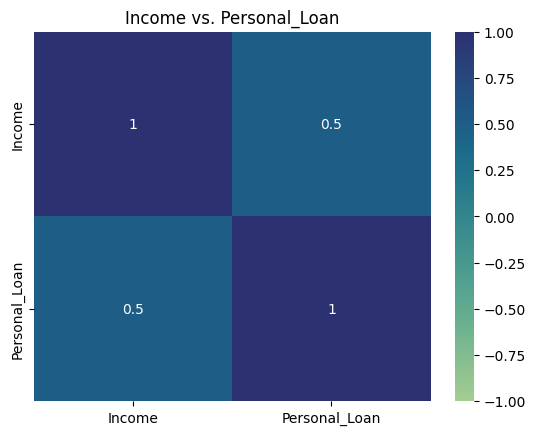

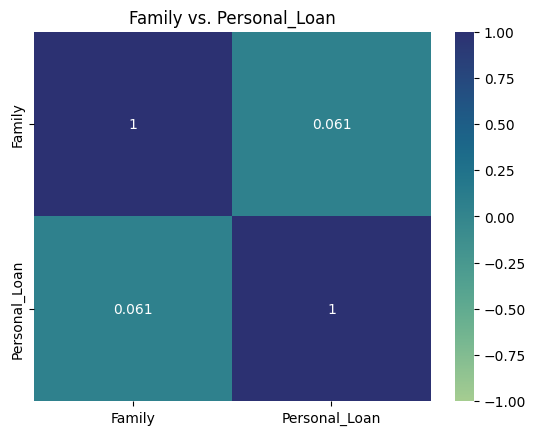

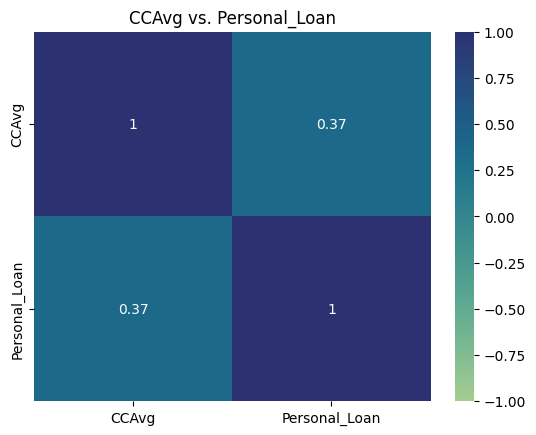

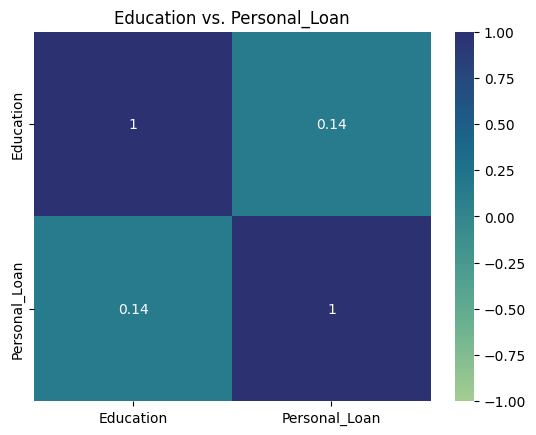

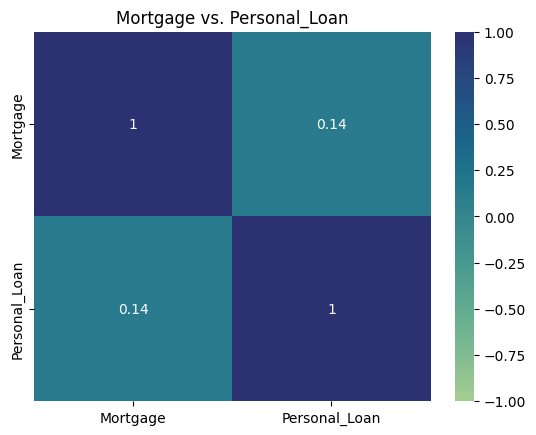

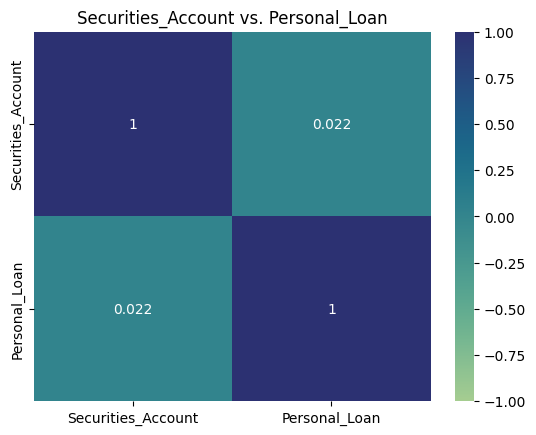

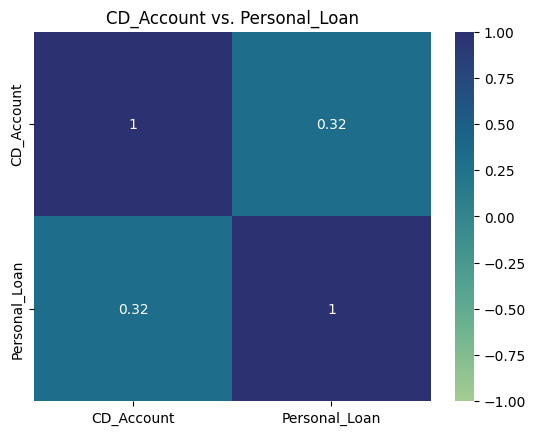

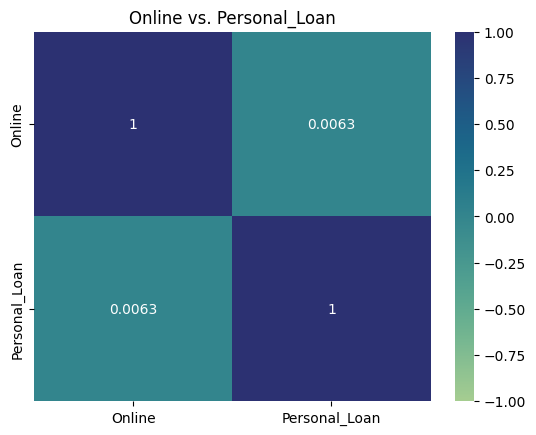

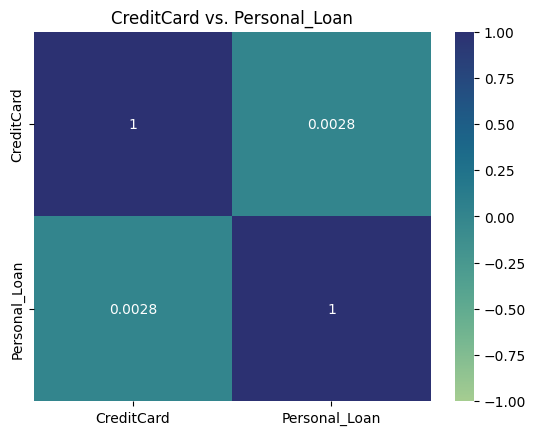

In [ ]:
#Features excluding the categorical columns ID and ZIPCode
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']

#Generate a heatmap to show correlation between each feature and Personal_Loan
for feature in features:
  corr_matrix = loan[[feature, 'Personal_Loan']].corr()
  plt.title(f'{feature} vs. Personal_Loan')
  sns.heatmap(corr_matrix, annot=True, vmin=-1.0, vmax=1.0, cmap='crest')
  plt.show()

###Correlation Table

<table align="left">
  <tr>
    <th>Feature</th>
    <th>Target</th>
    <th>Value
  </tr>
  <tr>
    <td>Age</td>
    <td>Personal_Loan</td>
    <td>-0.0077</td>
  </tr>
  <tr>
    <td>Experience</td>
    <td>Personal_Loan</td>
    <td>-0.0074</td>
  </tr>
  <tr>
    <td><b>Income</b></td>
    <td><b>Personal_Loan</b></td>
    <td><b>0.5</b></td>
  </tr>
  <tr>
    <td>Family</td>
    <td>Personal_Loan</td>
    <td>0.061</td>
  </tr>
  <tr>
    <td><b>CCAvg</b></td>
    <td><b>Personal_Loan</b></td>
    <td><b>0.37</b></td>
  </tr>
  <tr>
    <td>Education</td>
    <td>Personal_Loan</td>
    <td>0.14</td>
  </tr>
  <tr>
    <td>Mortgage</td>
    <td>Personal_Loan</td>
    <td>0.14</td>
  </tr>
   <tr>
    <td>Securities_Account</td>
    <td>Personal_Loan</td>
    <td>0.022</td>
  </tr>
  <tr>
    <td><b>CD_Account</b></td>
    <td><b>Personal_Loan</b></td>
    <td><b>0.32</b></td>
  </tr>
  <tr>
    <td>Online</td>
    <td>Personal_Loan</td>
    <td>0.0063</td>
  </tr>
  <tr>
    <td>CreditCard</td>
    <td>Personal_Loan</td>
    <td>0.0028</td>
  </tr>
</table>





###**Observations:**

* The top three features that have a weak to moderate positive correlation with Personal_Loan:
  * Income = 0.5
  * CCAvg = 0.37
  * CD_Account = 0.32
* Two attributes have a very weak negative correlation with Personal_Loan:
  * Age = -0.0077
  * Experience = -0.0074
* Education and Mortgage have the same correlation with Personal_Loan with a value of 0.14
* None of the attributes have a strong correlation (0.7 or higher) with Personal_Loan

###**Relationship Between Age and Customer's Interest in Loan Purchase**

###View relationship between age and number of customers who want a personal loan

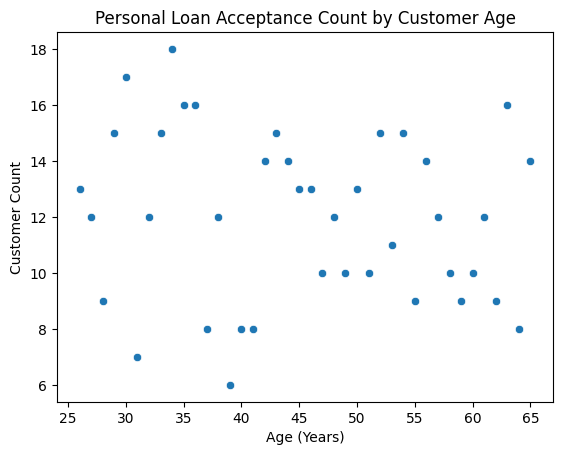

In [ ]:
#Filter dataframe for the customers who said "yes" to a personal loan
age_loan_interest = loan[loan['Personal_Loan']==1]

#Use groupby on Age and get a count of customers for each age that want a personal loan
age_loan_group = age_loan_interest.groupby('Age')['Personal_Loan'].count().reset_index()

#Sort Age column in ascending order
age_loan_group_sorted = age_loan_group.sort_values('Age')

#Drop the index column
age_loan_df = age_loan_group_sorted.reset_index().drop('index', axis=1)

#Rename Personal_Loan to Customer_Count
age_loan_df = age_loan_df.rename(columns={'Personal_Loan': 'Customer_Count_Yes'})

#Create a scatter plot of Personal Loan vs. Age
sns.scatterplot(data=age_loan_df, x='Age', y='Customer_Count_Yes')

#Label x and y axes
plt.xlabel('Age (Years)')
plt.ylabel('Customer Count')

#Include a title
plt.title('Personal Loan Acceptance Count by Customer Age')

plt.show()

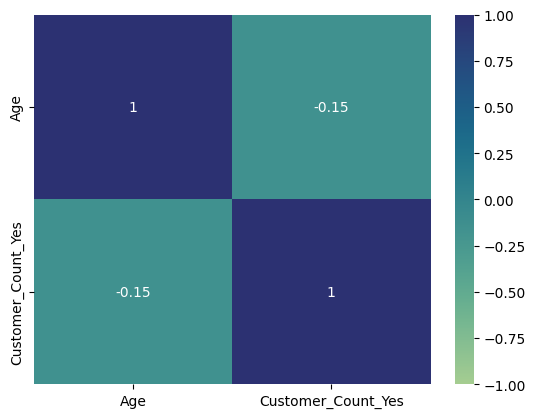

In [ ]:
#Generate a heatmap to view correlation between age and number of customers who want a personal loan
corr_matrix = age_loan_df.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1.0, vmax=1.0, cmap='crest')

plt.show()

**Observations:**
* There is a weak negative correlation of -0.15 between age and customers who want a personal loan
* Most customers who do want the loan are between the ages of 30 to 35
* There are a small amount of customers in the 55-65 age group who want a personal loan

###View relationship between age and number of customers who do not want a personal loan

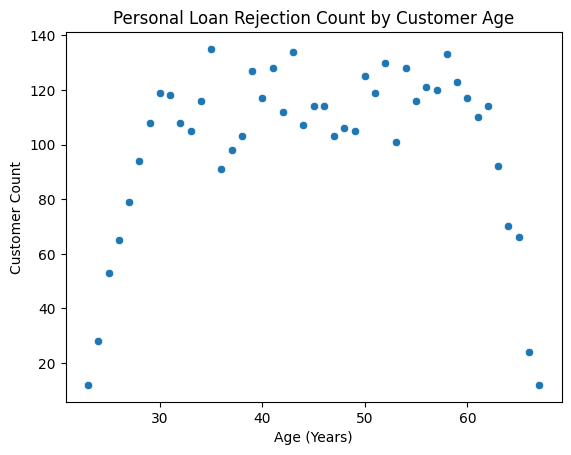

In [ ]:
#Filter dataframe for the customers who said "no" to a personal loan
age_loan_interest = loan[loan['Personal_Loan']==0]

#Use groupby on Age and get a count of customers for each age that do not want a personal loan
age_no_loan_group = age_loan_interest.groupby('Age')['Personal_Loan'].count().reset_index()

#Sort Age column in ascending order
age_no_loan_group_sorted = age_no_loan_group.sort_values('Age')

#Drop the index column
age_no_loan_df = age_no_loan_group_sorted.reset_index().drop('index', axis=1)

#Rename Personal_Loan to Customer_Count
age_no_loan_df = age_no_loan_df.rename(columns={'Personal_Loan': 'Customer_Count_No'})

#Create a scatter plot of Personal Loan vs. Age
sns.scatterplot(data=age_no_loan_df, x='Age', y='Customer_Count_No')

#Label x and y axes
plt.xlabel('Age (Years)')
plt.ylabel('Customer Count')

#Include a title
plt.title('Personal Loan Rejection Count by Customer Age')

plt.show()

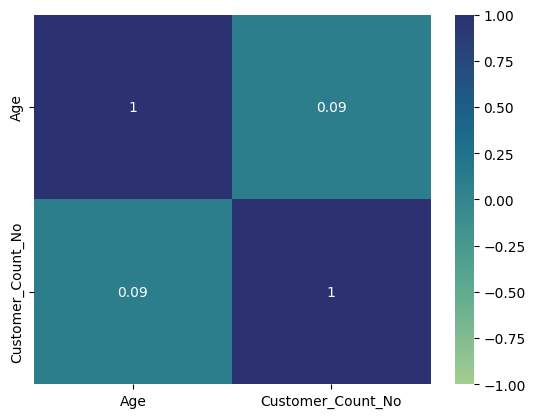

In [ ]:
#Generate a heatmap to view correlation between age and number of customers who do not want a personal loan
corr_matrix = age_no_loan_df.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1.0, vmax=1.0, cmap='crest')

plt.show()

**Observations:**
* There is a very weak positive correlation of 0.09 between age and customers who do not want a personal loan
* Most customers who do not want the loan are between the ages of 30 to 60
* A small amount of customers in the under 30 and over 60 groups do not want a personal loan

###Comparison between the number of customers who want / do not want a personal loan

In [ ]:
#Do an outer merge for the age_loan_df and age_no_loan_df dataframes
age_loan_comparison = pd.merge(age_loan_df, age_no_loan_df, on='Age', how='outer')

#Check to see if any null values are present
age_loan_comparison.isnull().sum()

Age                   0
Customer_Count_Yes    5
Customer_Count_No     0
dtype: int64

In [ ]:
#Fill NAs in Customer_Count_Yes column with zeros
age_loan_comparison['Customer_Count_Yes'].fillna(0, inplace=True)

#Include Customer_Count feature by adding total number of customers who want / do not want the personal loan
age_loan_comparison['Customer_Count'] = age_loan_comparison['Customer_Count_Yes'] + age_loan_comparison['Customer_Count_No']

#Include Percent_Interest feature by dividing the Customer_Count_Yes column by the Customer_Count column times 100 and round to two decimal places
age_loan_comparison['Percent_Interest'] = round(age_loan_comparison['Customer_Count_Yes'] / age_loan_comparison['Customer_Count'] * 100, 2)

#Check the dataframe for NAs
age_loan_comparison

,Age,Customer_Count_Yes,Customer_Count_No,Customer_Count,Percent_Interest
0,26,13.0,65,78.0,16.67
1,27,12.0,79,91.0,13.19
2,28,9.0,94,103.0,8.74
3,29,15.0,108,123.0,12.20
4,30,17.0,119,136.0,12.50
5,31,7.0,118,125.0,5.60
6,32,12.0,108,120.0,10.00
7,33,15.0,105,120.0,12.50
8,34,18.0,116,134.0,13.43
9,35,16.0,135,151.0,10.60


In [ ]:
#Find ages of customers who have no interest in a personal loan
age_zero_interest = age_loan_comparison[age_loan_comparison['Percent_Interest']==0]

age_zero_interest

,Age,Customer_Count_Yes,Customer_Count_No,Customer_Count,Percent_Interest
40,23,0.0,12,12.0,0.0
41,24,0.0,28,28.0,0.0
42,25,0.0,53,53.0,0.0
43,66,0.0,24,24.0,0.0
44,67,0.0,12,12.0,0.0


In [ ]:
#Find percent of customers who want a personal loan
age_loan_comparison['Customer_Count_Yes'].sum() / loan.shape[0] * 100

9.6

###**Observations:**
* Very weak correlations exist between customer age and interest / no interest in personal loan
  * Age and Personal Loan Interest = -0.15
  * Age and No Personal Loan Interest = 0.09
* The very young and older aged customers expressed no interest in taking out a personal loan
  * Young: Ages 23-25
  * Old: Ages 66-67
* All other ages have a small amount of interest in a personal loan  
* Overall, less than 10% of the customer base prefer to borrow any money from AllLife Bank

###**Relationship Between Education and Customer's Interest in Loan Purchase**

###Number of customers who desire a personal loan by education group

In [ ]:
#Filter dataframe for the customers who said "yes" to a personal loan
education_loan_interest = loan[loan['Personal_Loan']==1]

#Use groupby on Education and get a count of customers for each education group that wants a personal loan
education_loan_group = education_loan_interest.groupby('Education')['Personal_Loan'].count().reset_index()

#Sort Education column in ascending order
education_loan_group_sorted = education_loan_group.sort_values('Education')

#Drop the index column
education_loan_df = education_loan_group_sorted.reset_index().drop('index', axis=1)

#Rename Personal_Loan to Customer_Count
education_loan_df = education_loan_df.rename(columns={'Personal_Loan': 'Customer_Count_Yes'})

education_loan_df

,Education,Customer_Count_Yes
0,1,93
1,2,182
2,3,205


###Number of customers who do not want a personal loan by education group

In [ ]:
#Filter dataframe for the customers who said "yes" to a personal loan
education_no_loan_interest = loan[loan['Personal_Loan']==0]

#Use groupby on Education and get a count of customers for each education group that do not want a personal loan
education_no_loan_group = education_no_loan_interest.groupby('Education')['Personal_Loan'].count().reset_index()

#Sort Education column in ascending order
education_no_loan_group_sorted = education_no_loan_group.sort_values('Education')

#Drop the index column
education_no_loan_df = education_no_loan_group_sorted.reset_index().drop('index', axis=1)

#Rename Personal_Loan to Customer_Count
education_no_loan_df = education_no_loan_df.rename(columns={'Personal_Loan': 'Customer_Count_No'})

education_no_loan_df

,Education,Customer_Count_No
0,1,2003
1,2,1221
2,3,1296


###Comparison of Both Groups

In [ ]:
#Merge the Yes and No education/personal loan dataframes
education_personal_loan = pd.merge(education_loan_df, education_no_loan_df, on='Education', how='outer')

education_personal_loan

,Education,Customer_Count_Yes,Customer_Count_No
0,1,93,2003
1,2,182,1221
2,3,205,1296


###**Observations:**
* Recall the education groups:
  * Group 1 = Undergraduate Students
  * Group 2 = Graduate Students
  * Group 3 = Advanced Degree Students / Working Professionals
* Undergraduate students show the least interest in a personal loan
* Advanced degree students and working professionals show the greatest interest in a personal loan
* These results make sense for a couple of reasons:
  * Many undergraduates do not need a personal loan:
    * They already have student loans
    * Limited income / Low credit to repay the loan
  * Advanced degree students and working professionals may take out a personal loan to:
    * Start a new business
    * Cover unexpected expenses - family, medical, etc.
    * Working professionals are able to repay the loan than undergraduates due to higher income

###Treat Experience Feature

In [ ]:
#Replace negative values in Experience column with positive values
loan["Experience"].replace(-1, 1, inplace=True)
loan["Experience"].replace(-2, 2, inplace=True)
loan["Experience"].replace(-3, 3, inplace=True)

###Correlation between numerical features

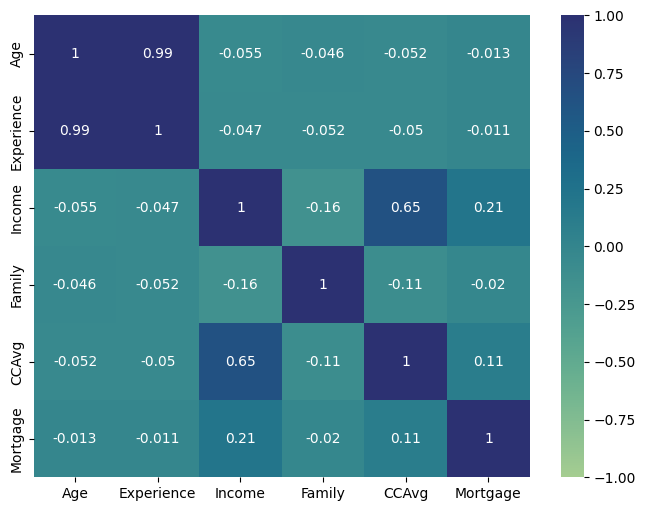

In [ ]:
#Set figure size
plt.figure(figsize=(8,6))

#Create a heatmap to show correlation matrix between all numerical features
corr_matrix = loan[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']].corr()
sns.heatmap(corr_matrix, annot=True, vmin=-1.0, vmax=1.0, cmap='crest')

plt.show()

###**Observations:**
* Age and Experience has the strongest correlation of 0.99
* Income and CCAvg have a moderate to strong correlation of 0.65
* These values sound reasonable
  * Older people tend to have more work experience
  * People with higher salaries will most likely spend more on credit cards each month

###**Univariate Analysis**

###Age

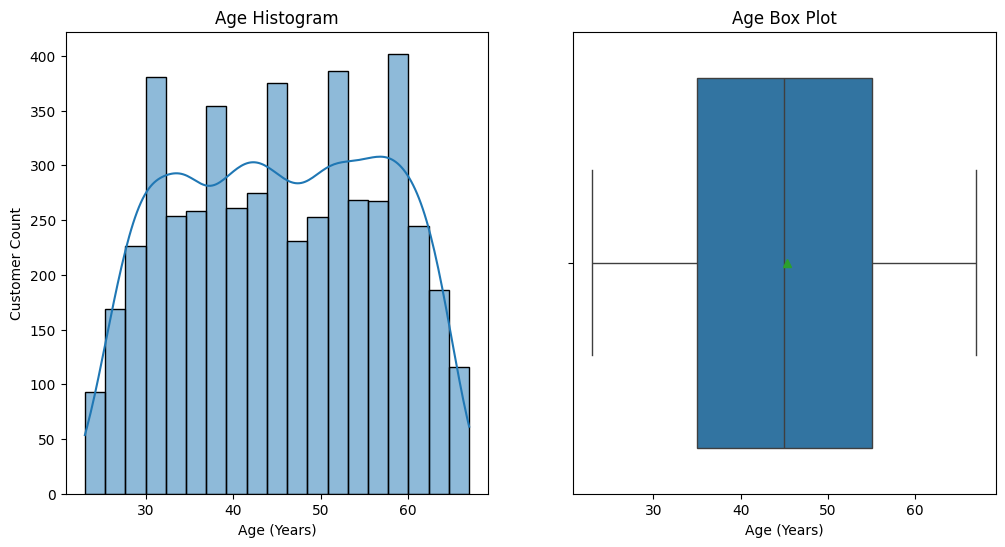

In [ ]:
#Set figure size
plt.figure(figsize=(12,6))

#Plot histogram of Age feature
plt.subplot(1,2,1)
sns.histplot(data=loan, x='Age', kde=True)

#Label x and y axes
plt.xlabel('Age (Years)')
plt.ylabel('Customer Count')

#Include title
plt.title('Age Histogram')

#Plot box plot of Age feature
plt.subplot(1,2,2)
sns.boxplot(data=loan, x='Age', showmeans=True)

#Label x axis
plt.xlabel('Age (Years)')

#Include title
plt.title('Age Box Plot')

plt.show()

In [ ]:
#Get the mode, mean, and median of Age
loan['Age'].mode(), loan['Age'].mean(), loan['Age'].median()

(0    35
 Name: Age, dtype: int64,
 45.3384,
 45.0)

* Age feature is slightly right skewed distribution based on the following statistics:
  * Mean: 45.3
  * Median: 45
  * Mode: 35
* Histogram and KDE plot show that many customers belong in the ages of 55-60
* Fewer customers are either under 30 or over 65 years

###Experience

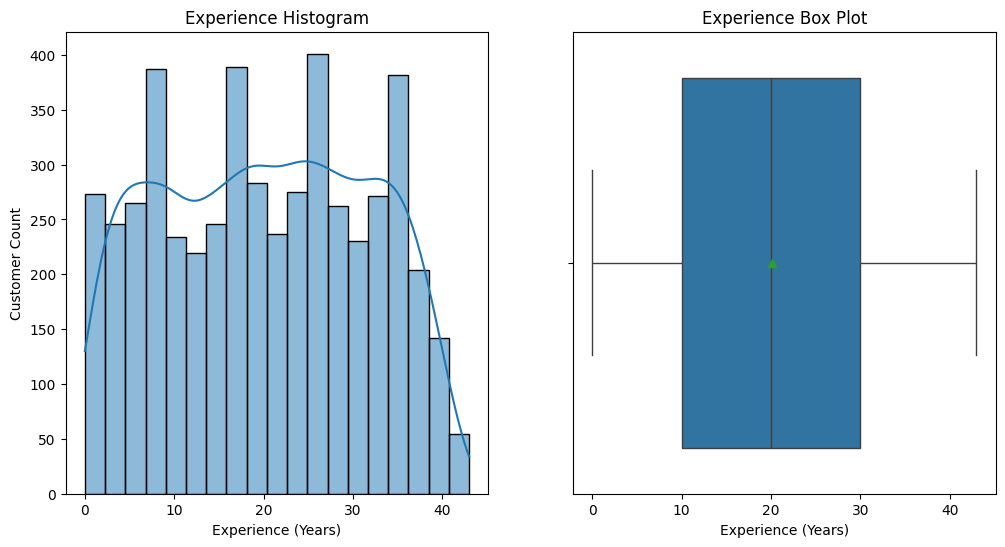

In [ ]:
#Set figure size
plt.figure(figsize=(12,6))

#Plot histogram of Experience feature
plt.subplot(1,2,1)
sns.histplot(data=loan, x='Experience', kde=True)

#Label x and y axes
plt.xlabel('Experience (Years)')
plt.ylabel('Customer Count')

#Include title
plt.title('Experience Histogram')

#Plot box plot of Experience feature
plt.subplot(1,2,2)
sns.boxplot(data=loan, x='Experience', showmeans=True)

#Label x axis
plt.xlabel('Experience (Years)')

#Include title
plt.title('Experience Box Plot')

plt.show()

In [ ]:
#Get mode, mean, and median of Experience feature
loan['Experience'].mode(), loan['Experience'].mean(), loan['Experience'].median()

(0    32
 Name: Experience, dtype: int64,
 20.1346,
 20.0)

* Experience is somewhat uniform to a normal distribution with slight skewness:
  * Mode: 32 years
  * Mean: 20.13 years
  * Median: 20 years
* The mean/median of experience appears to correlate well with mean/median of age
   * Mean/Median age of customers is 45 years - have around 20 years work experience
   * Many customers are older in the 55-60 years range - have over 30 years of work experience

###Income

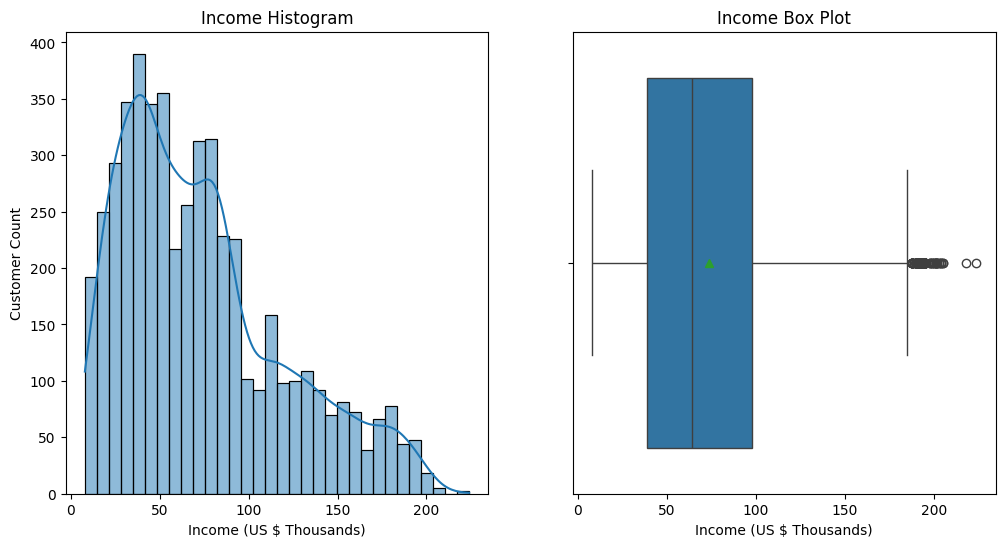

In [ ]:
#Set figure size
plt.figure(figsize=(12,6))

#Plot histogram of Income feature
plt.subplot(1,2,1)
sns.histplot(data=loan, x='Income', kde=True)

#Label x and y axes
plt.xlabel('Income (US $ Thousands)')
plt.ylabel('Customer Count')

#Include title
plt.title('Income Histogram')

#Plot box plot of Income feature
plt.subplot(1,2,2)
sns.boxplot(data=loan, x='Income', showmeans=True)

#Label x axis
plt.xlabel('Income (US $ Thousands)')

#Include title
plt.title('Income Box Plot')

plt.show()

In [ ]:
#Get mode, mean, and median of Income feature
loan['Income'].mode(), loan['Income'].mean(), loan['Income'].median()

(0    44
 Name: Income, dtype: int64,
 73.7742,
 64.0)

In [ ]:
#Find number of customers who earn over $186,500
loan[loan['Income'] > 186.5].shape[0]

96

* We can see that Income is skewed to the right based on the histogram, KDE, and box plots
* Most customers earn annual salary of \$44,000
* Mean income is \$73,774.20; Median income is \$64,000
* Box Plot Statistics:
  * First Quartile Q1: \$39,000
  * Third Quartile Q3: \$98,000
  * Upper Fence/Whisker: Q3 + 1.5 * IQR = \$186,500
* There are several outliers with Income feature
  * 96 customers earn over \$186,500

###Credit Card Average

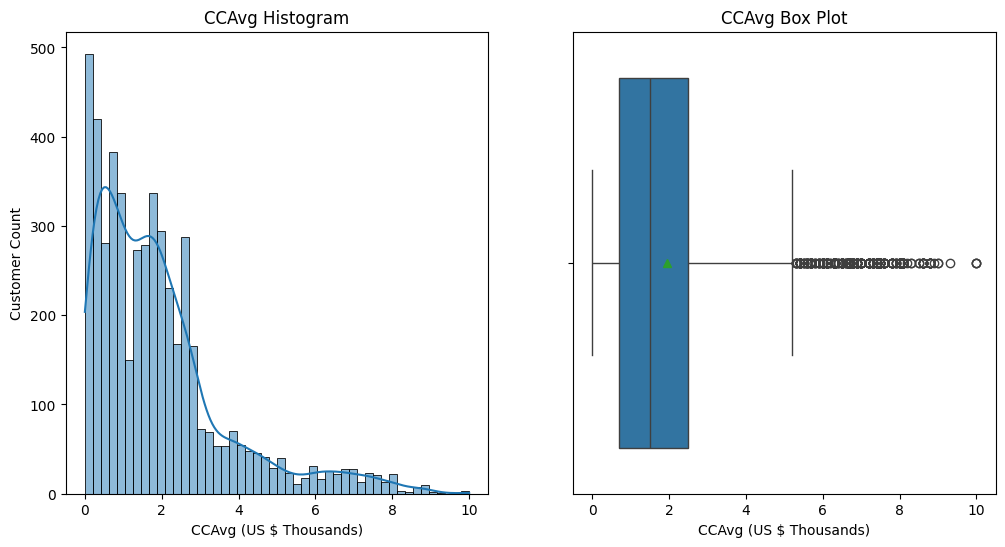

In [ ]:
#Set figure size
plt.figure(figsize=(12,6))

#Plot histogram of Income feature
plt.subplot(1,2,1)
sns.histplot(data=loan, x='CCAvg', kde=True)

#Label x and y axes
plt.xlabel('CCAvg (US $ Thousands)')
plt.ylabel('Customer Count')

#Include title
plt.title('CCAvg Histogram')

#Plot box plot of Income feature
plt.subplot(1,2,2)
sns.boxplot(data=loan, x='CCAvg', showmeans=True)

#Label x axis
plt.xlabel('CCAvg (US $ Thousands)')

#Include title
plt.title('CCAvg Box Plot')

plt.show()

In [ ]:
#Get mode, mean, and median of CCAvg feature
loan['CCAvg'].mode(), loan['CCAvg'].mean(), loan['CCAvg'].median()

(0    0.3
 Name: CCAvg, dtype: float64,
 1.9379380000000002,
 1.5)

In [ ]:
#Find total number of customers who spend over $5,200 each month on credit cards
loan[loan['CCAvg'] > 5.2].shape[0]

324

* Credit Card Average is skewed to the right
  * Mode: \$300/month
  * Median: \$1,500/month
  * Mean: \$1,938/month
* Box plot indicates several outliers for customers who spend over a few thousand each month
  * Q1: \$700/month
  * Q3: \$2,500/month
  * Upper Fence/Whisker: Q3 + 1.5 * IQR = \$5,200/month
* 324 customers spend an average of over \$5,200/month on credit cards

###Education

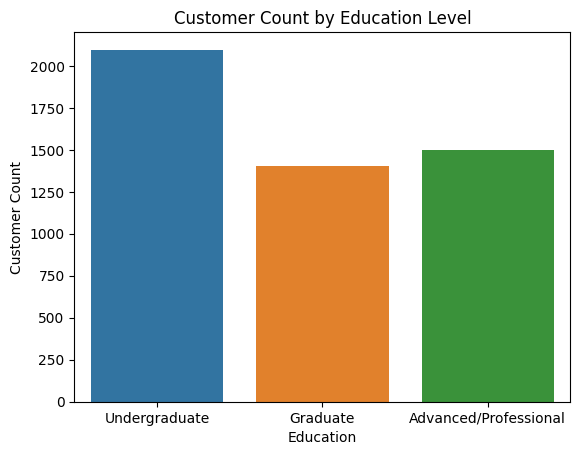

In [ ]:
#Make copy so original data is not affected
edu = data.copy()

#Map 1, 2, 3 values in Education column to their respective education level categories
edu['Education'] = edu['Education'].map({1: 'Undergraduate', 2: 'Graduate', 3: 'Advanced/Professional'})

#Create count plot of Education
sns.countplot(data=edu, x='Education', hue='Education')

#Label x and y axes
plt.xlabel('Education')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Education Level')

plt.show()

In [ ]:
#Get percentage of customers by their education level
edu['Education'].value_counts(normalize=True)

Education
Undergraduate            0.4192
Advanced/Professional    0.3002
Graduate                 0.2806
Name: proportion, dtype: float64

* Here is a breakdown of the customer base by Education Level:
  * Undergraduate Students - 42%
  * Advanced / Working Professionals - 30%
  * Graduate Students - 28%

###Family

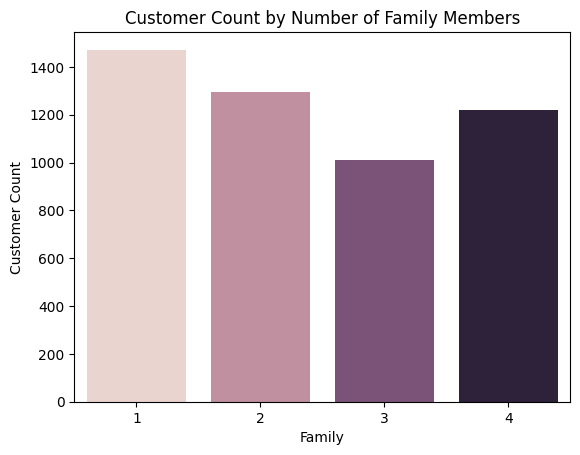

In [ ]:
#Create count plot of Family
sns.countplot(data=edu, x='Family', hue='Family', legend=None)

#Label x and y axes
plt.xlabel('Family')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Number of Family Members')

plt.show()

In [ ]:
#Get percentages of customer count for family category
loan['Family'].value_counts(normalize=True)

Family
1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: proportion, dtype: float64

* There are four categories in the Family feature:
  * Family of 1: 29.44%
  * Family of 2: 25.92%
  * Family of 3: 24.44%
  * Family of 4: 20.20%
* Over 55% of the banking customers are single or belong to a family of 2 members
* More than 44% of the banking customers belong to a family of 3 or 4 members

###ZIP Code

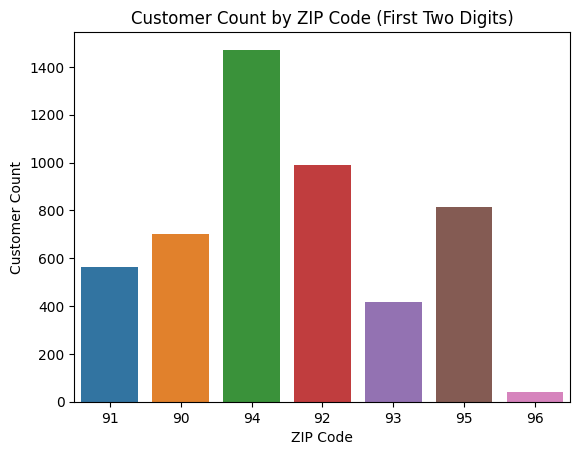

In [ ]:
#Make copy of data to not affect the original
zip_code = data.copy()

#Convert ZIPCode to string
zip_code['ZIPCode'] = zip_code['ZIPCode'].astype(str)

#Extract first two digts from ZIPCode
zip_code['ZIPCode'] = zip_code['ZIPCode'].str[0:2]

#Create count plot of ZIPCode
sns.countplot(data=zip_code, x='ZIPCode', hue='ZIPCode')

#Label x and y axes
plt.xlabel('ZIP Code')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by ZIP Code (First Two Digits)')

plt.show()

In [ ]:
#Get value counts of ZIP Code
zip_code['ZIPCode'].value_counts(normalize=True)

ZIPCode
94    0.2944
92    0.1976
95    0.1630
90    0.1406
91    0.1130
93    0.0834
96    0.0080
Name: proportion, dtype: float64

* Breakdown of the customer population by ZIP Code (starting with first two digits):
  * 94 (San Francisco Bay Area) - 29.44%
  * 92 (San Francisco Bay Area / Northern California) - 19.76%
  * 95 (San Francisco Bay Area / Central Valley / Northern California) - 16.30%
  * 90 (Greater Los Angeles Area) - 14.06%
  * 91 (Southern California) - 11.30%
  * 93 (Eastern California / Nevada) - 8.34%
  * 96 (Northern California) - 0.8%
* About 50% of the customers live in the San Francisco Bay Area and Northern California
* More than 25% of the customers live in Southern California / Greater Los Angeles Area
* Over 9% of the customers live either in Eastern/Northern California or Nevada

###Personal Loan

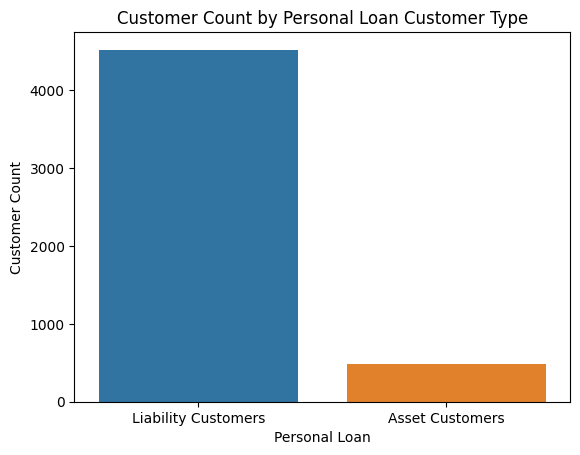

In [ ]:
#Make copy so original data is not affected
personal_loan = data.copy()

#Map 1 to Asset Customers who take out a personal loan and 0 to Liability Customers who do not take out a personal loan
personal_loan['Personal_Loan'] = edu['Personal_Loan'].map({1: 'Asset Customers', 0: 'Liability Customers'})

#Create count plot of Personal Loan
sns.countplot(data=personal_loan, x='Personal_Loan', hue='Personal_Loan')

#Label x and y axes
plt.xlabel('Personal Loan')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Personal Loan Customer Type')

plt.show()

In [ ]:
#Get value counts on Personal Loan
personal_loan['Personal_Loan'].value_counts(normalize=True)

Personal_Loan
Liability Customers    0.904
Asset Customers        0.096
Name: proportion, dtype: float64

* Breakdown of Customer Type:
  * Liability Customers - 90.4%
  * Asset Customers - 9.6%
* Roughly 9 out of 10 customers refuse to take out a personal loan
* About 1 out of 10 customers agree to take out a personal loan

###Securities Account

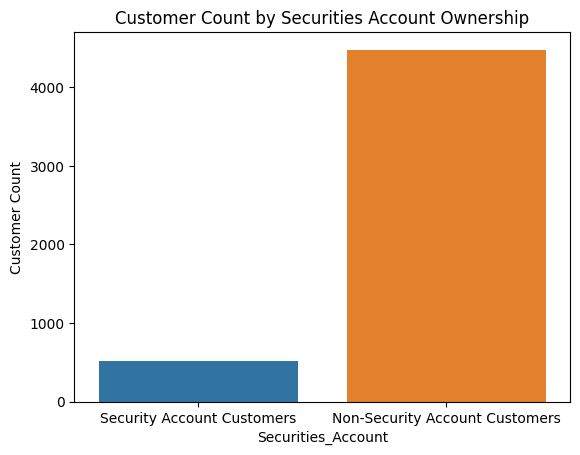

In [ ]:
#Make copy so original data is not affected
securities_account = data.copy()

#Map 1 to customers who own a securities account and 0 to customers who do not own a securities account
securities_account['Securities_Account'] = securities_account['Securities_Account'].map({1: 'Security Account Customers', 0: 'Non-Security Account Customers'})

#Create count plot of securities account
sns.countplot(data=securities_account, x='Securities_Account', hue='Securities_Account')

#Label x and y axes
plt.xlabel('Securities_Account')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Securities Account Ownership')

plt.show()

In [ ]:
#Get value counts for securities account feature
securities_account['Securities_Account'].value_counts(normalize=True)

Securities_Account
Non-Security Account Customers    0.8956
Security Account Customers        0.1044
Name: proportion, dtype: float64

* Here is a breakdown of securities account ownership:
  * 89.56% of customers do not own a securities account
  * 10.44% of customers own a securities account

###CD Account

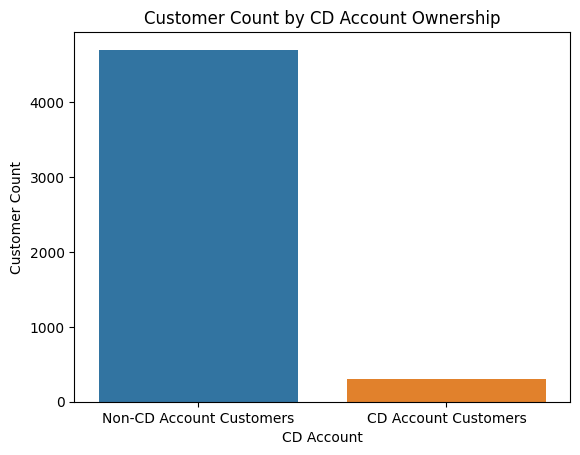

In [ ]:
#Make copy so original data is not affected
cd_account = data.copy()

#Map 1 to customers who own a CD account and 0 to customers who do not own a CD account
cd_account['CD_Account'] = cd_account['CD_Account'].map({1: 'CD Account Customers', 0: 'Non-CD Account Customers'})

#Create count plot of CD account
sns.countplot(data=cd_account, x='CD_Account', hue='CD_Account')

#Label x and y axes
plt.xlabel('CD Account')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by CD Account Ownership')

plt.show()

In [ ]:
#Get value counts of CD account feature
cd_account['CD_Account'].value_counts(normalize=True)

CD_Account
Non-CD Account Customers    0.9396
CD Account Customers        0.0604
Name: proportion, dtype: float64

* Breakdown of CD account ownership:
  * 93.96% of customers do not own a CD account
  * 6.04% of customers own a CD account

###Online

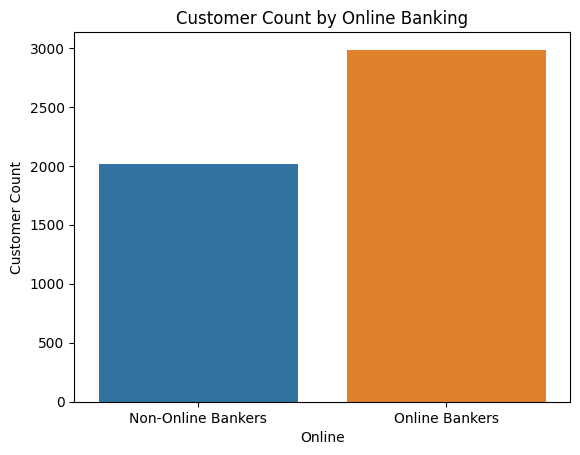

In [ ]:
#Make copy so original data is not affected
online = data.copy()

#Map 1 to customers who use online banking services and 0 to customers who do not bank online
online['Online'] = online['Online'].map({1: 'Online Bankers', 0: 'Non-Online Bankers'})

#Create count plot of Online Banking
sns.countplot(data=online, x='Online', hue='Online')

#Label x and y axes
plt.xlabel('Online')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Online Banking')

plt.show()

In [ ]:
#Get value counts for online banking
online['Online'].value_counts(normalize=True)

Online
Online Bankers        0.5968
Non-Online Bankers    0.4032
Name: proportion, dtype: float64

* Breakdown of online banking customers:
  * 59.68% of customers use online banking services
  * 40.32% of customers do not bank online

###Credit Card

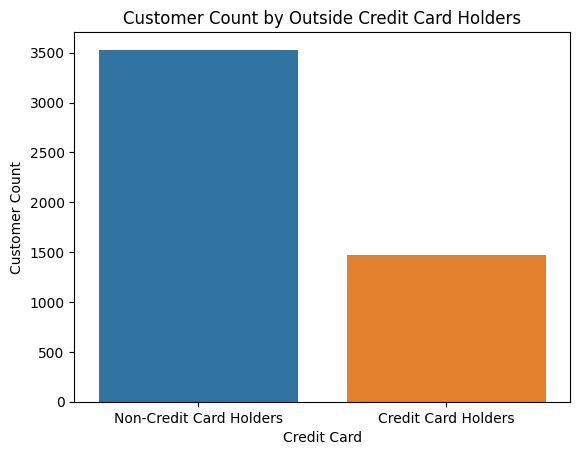

In [ ]:
#Make copy so original data is not affected
credit_card = data.copy()

#Map 1 to customers who own a credit card outside of AllLife Bank and 0 to customers who do not own a credit card outside of AllLife Bank
credit_card['CreditCard'] = credit_card['CreditCard'].map({1: 'Credit Card Holders', 0: 'Non-Credit Card Holders'})

#Create count plot of credit card holders
sns.countplot(data=credit_card, x='CreditCard', hue='CreditCard')

#Label x and y axes
plt.xlabel('Credit Card')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Outside Credit Card Holders')

plt.show()

In [ ]:
#Get value counts of outside credit card holders
credit_card['CreditCard'].value_counts(normalize=True)

CreditCard
Non-Credit Card Holders    0.706
Credit Card Holders        0.294
Name: proportion, dtype: float64

* Breakdown of credit card holders outside of AllLife Bank:
  * 70.6% do not own a credit card outside their bank
  * 29.4% do own a credit card from another bank

###**Bivariate Analysis: Personal Loan vs. Features**

###Personal Loan vs. Credit Card Average

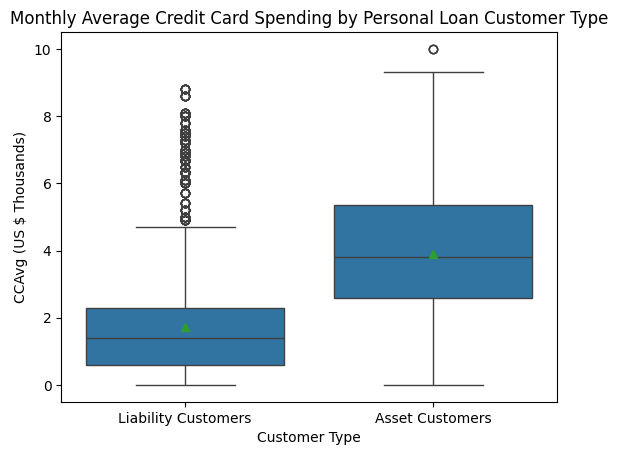

In [ ]:
#Create a copy of data to not affect original
cc_avg = data.copy()

#Map Personal Loan values - 0 to liability customers and 1 to asset customers
cc_avg['Personal_Loan'] = cc_avg['Personal_Loan'].map({0: 'Liability Customers', 1: 'Asset Customers'})

#Create a boxplot of Credit Card Average vs. Personal Loan Customer Type
sns.boxplot(data=cc_avg, x='Personal_Loan', y='CCAvg', showmeans=True)

#Label x and y axes
plt.xlabel('Customer Type')
plt.ylabel('CCAvg (US $ Thousands)')

#Include title
plt.title('Monthly Average Credit Card Spending by Personal Loan Customer Type')

plt.show()

* For the Liability Customers box plot:
  * The credit card average is a right skewed
  * Several outliers exist
* For the Asset Customers box plot:
  * The credit card average is slightly right skewed
  * A single outlier is present

###Personal Loan vs. Family

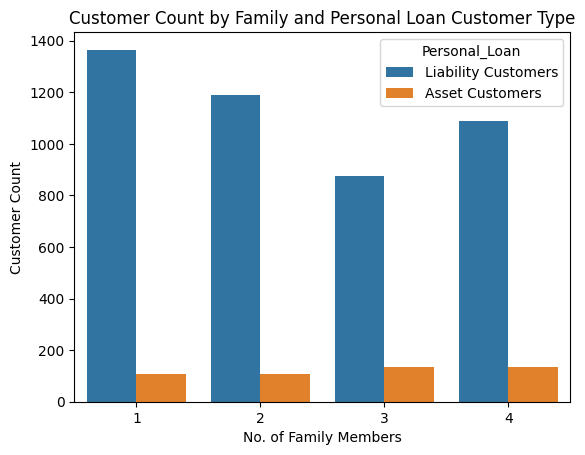

In [ ]:
#Create a copy of data to not affect original
family = data.copy()

#Map Personal Loan values - 0 to liability customers and 1 to asset customers
family['Personal_Loan'] = family['Personal_Loan'].map({0: 'Liability Customers', 1: 'Asset Customers'})

#Create a count plot of customer count by number of family members and personal loan class
#Blue indicates that customer has no interest in a personal loan
#Orange indicates that customer has an interest in a personal loan
sns.countplot(data=family, x='Family', hue='Personal_Loan')

#Label x and y axes
plt.xlabel('No. of Family Members')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Family and Personal Loan Customer Type')

plt.show()

* Most customers in all family sizes are liability customers
* Many of the asset customers come from larger families of 3 or 4 members
* Fewer asset customers are either single or come from a family of 2 members


###Personal Loan vs. Securities Account

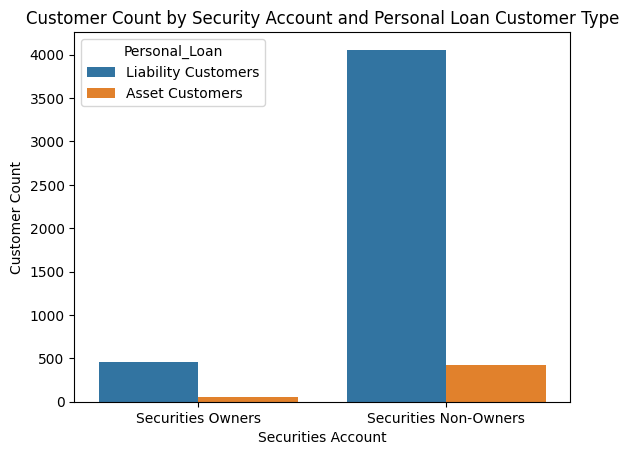

In [ ]:
#Create a copy of data to not affect original
securities = data.copy()

#Map Personal Loan values - 0 to liability customers and 1 to asset customers
securities['Personal_Loan'] = securities['Personal_Loan'].map({0: 'Liability Customers', 1: 'Asset Customers'})

#Map Securities Account values - 0 to non-securities account owners and 1 to securities account owners
securities['Securities_Account'] = securities['Securities_Account'].map({0: 'Securities Non-Owners', 1: 'Securities Owners'})

#Create count plot of customer count by people who either have or do not have a securities account
sns.countplot(data=securities, x='Securities_Account', hue='Personal_Loan')

#Label x and y axes
plt.xlabel('Securities Account')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Security Account and Personal Loan Customer Type')

plt.show()

* For customers who do not own a securities account:
  * Approximately 91% are liability customers
  * Slightly over 9% are asset customers
* For customers who own a securities account:
  * 88.5% are liability customers
  * 11.5% are asset customers

###Personal Loan vs. CD Account

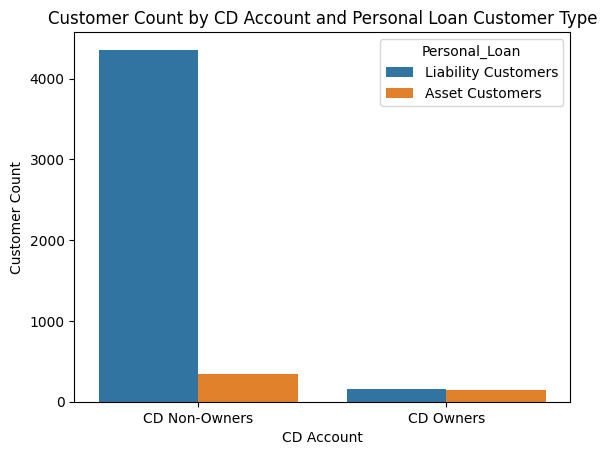

In [ ]:
#Create a copy of data to not affect original
cd = data.copy()

#Map Personal Loan values - 0 to liability customers and 1 to asset customers
cd['Personal_Loan'] = cd['Personal_Loan'].map({0: 'Liability Customers', 1: 'Asset Customers'})

#Map Securities Account values - 0 to non-securities account owners and 1 to securities account owners
cd['CD_Account'] = cd['CD_Account'].map({0: 'CD Non-Owners', 1: 'CD Owners'})

#Create count plot of customer count by people who either have or do not have a CD account
sns.countplot(data=cd, x='CD_Account', hue='Personal_Loan')

#Label x and y axes
plt.xlabel('CD Account')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by CD Account and Personal Loan Customer Type')

plt.show()

* Customers who do not own a CD account:
  * 93% are liability customers
  * 7% are asset customers
* Customers who own a CD account:
  * 54% are liability customers
  * 46% are asset customers

###Personal Loan vs. Online

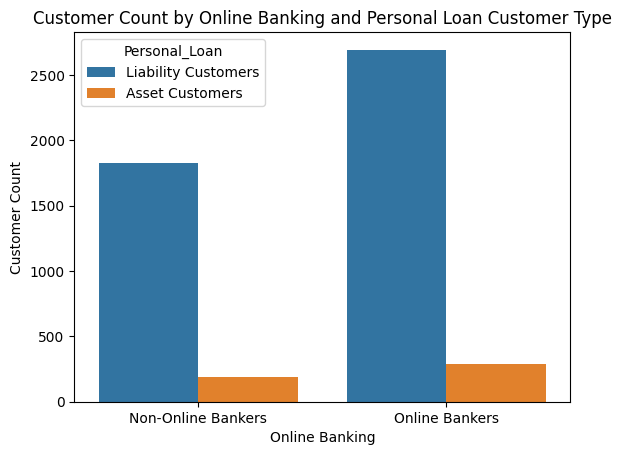

In [ ]:
#Create a copy of data to not affect original
online = data.copy()

#Map Personal Loan values - 0 to liability customers and 1 to asset customers
online['Personal_Loan'] = online['Personal_Loan'].map({0: 'Liability Customers', 1: 'Asset Customers'})

#Map Online Banking values - 0 to non-online bankers and 1 to online bankers
online['Online'] = online['Online'].map({0: 'Non-Online Bankers', 1: 'Online Bankers'})

#Create count plot of customer count by people who either use or do not use online banking facilities
sns.countplot(data=online, x='Online', hue='Personal_Loan')

#Label x and y axes
plt.xlabel('Online Banking')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Online Banking and Personal Loan Customer Type')

plt.show()

* For non-online banking customers:
  * 90.6% are liability customers
  * 9.4% are asset customers
* For online banking customers:
  * 90.25% are liability customers
  * 9.75% are asset customers

###Personal Loan vs. Credit Card

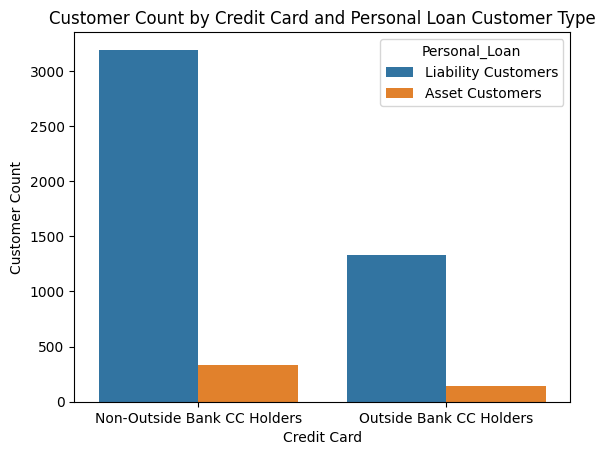

In [ ]:
#Create a copy of data to not affect original
creditcard = data.copy()

#Map Personal Loan values - 0 to liability customers and 1 to asset customers
creditcard['Personal_Loan'] = creditcard['Personal_Loan'].map({0: 'Liability Customers', 1: 'Asset Customers'})

#Map Credit Card values - 0 to customers that do not own a credit card outside of the bank and 1 to customers who do own credit card outside of the bank
creditcard['CreditCard'] = creditcard['CreditCard'].map({0: 'Non-Outside Bank CC Holders', 1: 'Outside Bank CC Holders'})

#Create count plot of customer count by people who either own or do not own a credit card from another bank
sns.countplot(data=creditcard, x='CreditCard', hue='Personal_Loan')

#Label x and y axes
plt.xlabel('Credit Card')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by Credit Card and Personal Loan Customer Type')

plt.show()

* For customers who do not own a credit card from another bank:
  * 90.45% are liability customers
  * 9.55% are asset customers
* For customers who do own a credit card from another bank:
  * 90.27% are liability customers
  * 9.73% are asset customers

###Personal Loan vs. ZIP Code

####Feature Engineering with ZIP Code

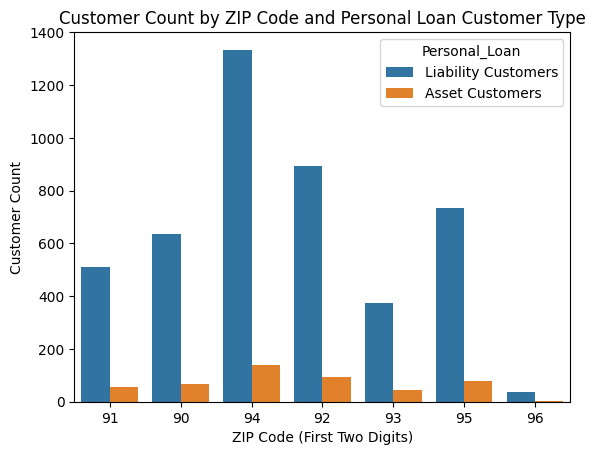

In [ ]:
#Create a copy of data to not affect original
zipcode = data.copy()

#Convert ZIPCode to string
zipcode['ZIPCode'] = zipcode['ZIPCode'].astype(str)

#Extract first two digts from ZIPCode
zipcode['ZIPCode'] = zipcode['ZIPCode'].str[0:2]

#Map Personal Loan values - 0 to liability customers and 1 to asset customers
zipcode['Personal_Loan'] = zipcode['Personal_Loan'].map({0: 'Liability Customers', 1: 'Asset Customers'})

#Create count plot of customer count by various ZIP Codes (first two digits)
sns.countplot(data=zipcode, x='ZIPCode', hue='Personal_Loan')

#Label x and y axes
plt.xlabel('ZIP Code (First Two Digits)')
plt.ylabel('Customer Count')

#Include title
plt.title('Customer Count by ZIP Code and Personal Loan Customer Type')

plt.show()

* For customers in the following ZIP Codes starting with:
  * 94 - Most asset and liability customers live in San Francisco Bay Area
  * 96 - Fewest asset and liability customers live Northern California
* Breakdown of personal loan interest by ZIP Code  (approximate figures):
  * 90: 90% - liability customers; 10% - asset customers
  * 91: 90% - liability customers; 10% - asset customers
  * 92: 90% - liability customers; 10% - asset customers
  * 93: 90% - liability customers; 10% - asset customers
  * 94: 91% - liability customers; 9% - asset customers
  * 95: 90% - liability customers; 10% - asset customers
  * 96: 92.5% - liability customers; 7.5% - asset customers
* Based on this, we can see that
  * Roughly 9 out of 10 customers in most ZIP Codes will refuse a personal loan
  * About 1 out of 10 customers in most ZIP Codes will accept a personal loan

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

###Feature Engineering with ZIP Code

In [ ]:
#Convert ZIPCode to string
loan['ZIPCode'] = loan['ZIPCode'].astype(str)

#Extract first two digts from ZIPCode
loan['ZIPCode'] = loan['ZIPCode'].str[0:2]

#View unique values in ZIPCode
loan['ZIPCode'].unique()

array(['91', '90', '94', '92', '93', '95', '96'], dtype=object)

####Age Group Column

In [ ]:
#Create function age_group to categorize ages of individual customers into a particular age group
def age_group(age):
  if age >= 20 and age <= 29:
    return '20-29'
  elif age >= 30 and age <= 39:
    return '30-39'
  elif age >= 40 and age <= 49:
    return '40-49'
  elif age >= 50 and age <= 59:
    return '50-59'
  else:
    return '60-69'

#Create Age_Group column by using apply and age_group functions
loan['Age_Group'] = loan['Age'].apply(age_group)

####Income Group Column

In [ ]:
#Create function income_class to categorize income class of individual customers based on annual salary
def income_class(income):
  if income <= 28:
    return 'Lower Class'
  elif income > 28 and income <= 55:
    return 'Lower Middle Class'
  elif income > 55 and income <= 89:
    return 'Middle Class'
  elif income > 89 and income <= 149:
    return 'Upper Middle Class'
  else:
    return 'Upper Class'

#Create Income_Group column by using apply and income_class functions
loan['Income_Class'] = loan['Income'].apply(income_class)

####Geographical Region Column

In [ ]:
#Create function geo_region to categorize regional location of individual customers based on ZIP Code
def geo_region(zipcode):
  if zipcode == '90':
    return 'Greater Los Angeles Area'
  elif zipcode == '91':
    return 'Southern California'
  elif zipcode == '92':
    return 'San Francisco Bay Area / Northern California'
  elif zipcode == '93':
    return 'Nevada / Eastern California'
  elif zipcode == '94':
    return 'San Francisco Bay Area'
  elif zipcode == '95':
    return 'San Francisco Bay Area / Central Valley / Northern California'
  elif zipcode == '96':
    return 'Northern California'

#Create Geographical Region column by using apply and geo_region functions
loan['Geographical_Region'] = loan['ZIPCode'].apply(geo_region)

###Preview Data with New Features

In [ ]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_Group,Income_Class,Geographical_Region
0,1,25,1,49,91,4,1.6,1,0,0,1,0,0,0,20-29,Lower Middle Class,Southern California
1,2,45,19,34,90,3,1.5,1,0,0,1,0,0,0,40-49,Lower Middle Class,Greater Los Angeles Area
2,3,39,15,11,94,1,1.0,1,0,0,0,0,0,0,30-39,Lower Class,San Francisco Bay Area
3,4,35,9,100,94,1,2.7,2,0,0,0,0,0,0,30-39,Upper Middle Class,San Francisco Bay Area
4,5,35,8,45,91,4,1.0,2,0,0,0,0,0,1,30-39,Lower Middle Class,Southern California


* Features that will be dropped prior to building the model:
  * ID
  * Experience
  * Age_Group
  * Income_Class
  * Geographical_Region
* New featuers such as Income Class and Geographical Region will help us target the right customers for our campaign

###Outlier Detection

In [ ]:
#Select the numerical features in dataset
numerical_features = ['Age', 'Income', 'CCAvg', 'Experience', 'Mortgage']

#Acquire total number of outliers (if any) for each feature
for feature in numerical_features:
  #Get the 1st and 3rd quartiles for each feature
  Q1 = loan[feature].quantile(0.25)
  Q3 = loan[feature].quantile(0.75)

  #Find IQR
  IQR = Q3 - Q1

  #Get lower and upper fences
  lower_fence = Q1 - 1.5*IQR
  upper_fence = Q3 + 1.5*IQR

  #Find total number of outliers
  #Filter dataframe for records that are less than the lower fence or greater than the upper fence
  outliers = loan[(loan[feature] < lower_fence) | (loan[feature] > upper_fence)].shape[0]

  #Print lower and upper fences for that feature
  print(f'Lower Fence for {feature}: {lower_fence}')
  print(f'Upper Fence for {feature}: {upper_fence}')

  #Print total number of outliers for that feature
  print(f'{feature} has {outliers} outliers')

  #Print dashed line
  print('-----------------------------------------')

Lower Fence for Age: 5.0
Upper Fence for Age: 85.0
Age has 0 outliers
-----------------------------------------
Lower Fence for Income: -49.5
Upper Fence for Income: 186.5
Income has 96 outliers
-----------------------------------------
Lower Fence for CCAvg: -2.0
Upper Fence for CCAvg: 5.2
CCAvg has 324 outliers
-----------------------------------------
Lower Fence for Experience: -20.0
Upper Fence for Experience: 60.0
Experience has 0 outliers
-----------------------------------------
Lower Fence for Mortgage: -151.5
Upper Fence for Mortgage: 252.5
Mortgage has 291 outliers
-----------------------------------------


**Observations:**
* 3 out of the 5 numerical features have outliers:
  * CCAvg - 324
  * Mortgage - 291
  * Income - 96
* Age and Experience have no outliers
  * Experience feature will be dropped since it is highly correlated with Age
* Data shows that people with higher incomes can afford more expensive homes and spend more on credit cards
* For this reason, we will not treat the Income, Mortgage, and CCAvg outliers


###Data Preparation For Model

In [ ]:
#Create the feature dataframe - drop Experience since it is almost perfectly correlated with Age
#Drop ID, Age_Group, Income_Class, and Geographical_Region since these columns are categorical features
#Personal_Loan is dropped since it is the target and will be the y-value
X = loan.drop(['ID', 'Experience', 'ZIPCode', 'Age_Group', 'Income_Class', 'Geographical_Region', 'Personal_Loan'], axis=1)

#Get dummy variables for Education, Family, and ZIPCode features
X = pd.get_dummies(X, columns=['Education', 'Family'], drop_first=True)

#Create the target dataframe - Personal_Loan
y = loan['Personal_Loan']

#Set up X and y training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#Check shape and percentage of training and testing sets
print('Shape of Training Set:', X_train.shape)
print('Shape of Testing Set:', X_test.shape)
print('')
print(f'Percentage of Training Set: {y_train.shape[0]/len(loan)*100} %')
print(f'Percentage of Testing Set: {y_test.shape[0]/len(loan)*100} %')

Shape of Training Set: (3500, 13)
Shape of Testing Set: (1500, 13)

Percentage of Training Set: 70.0 %
Percentage of Testing Set: 30.0 %


## Model Building

In [ ]:
#Build decision tree model with gini as the criterion and random state of 1
model = DecisionTreeClassifier(criterion='gini', random_state=1)

#Fit the model on the X and y training sets
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation Criterion

####Confusion Matrix of Training Data

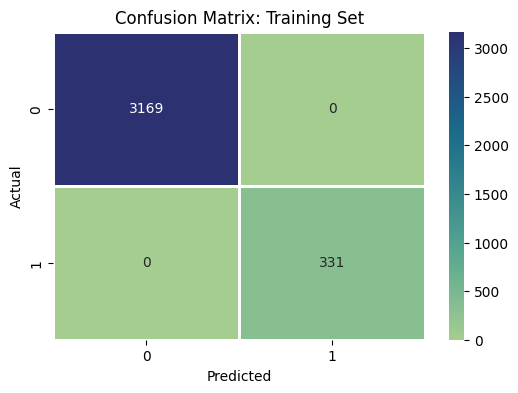

In [ ]:
#Get the predicted y values
y_pred = model.predict(X_train)

#Create the confusion matrix based on the y training and predicted values
cm = confusion_matrix(y_train, y_pred)

#Set figure for heatmap
plt.figure(figsize=(6,4))

#Create heatmap for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', linewidth=1, linecolor='white', cmap='crest')

#Label x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Include title
plt.title('Confusion Matrix: Training Set')

plt.show()

####Check model performance on training data

In [ ]:
#Get predicted y values from X training data
y_pred = model.predict(X_train)

#Get the accuracy, precision, recall, and F1 scores based on training and predicted y values
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

#Create performance dataframe
training_performance = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}, index=[0])

#Print performance dataframe
print(training_performance)

   Accuracy  Precision  Recall   F1
0       1.0        1.0     1.0  1.0


* Accuracy, Precision, Recall, and F1 scores on training data are 100%

####Visualize the Decision Tree

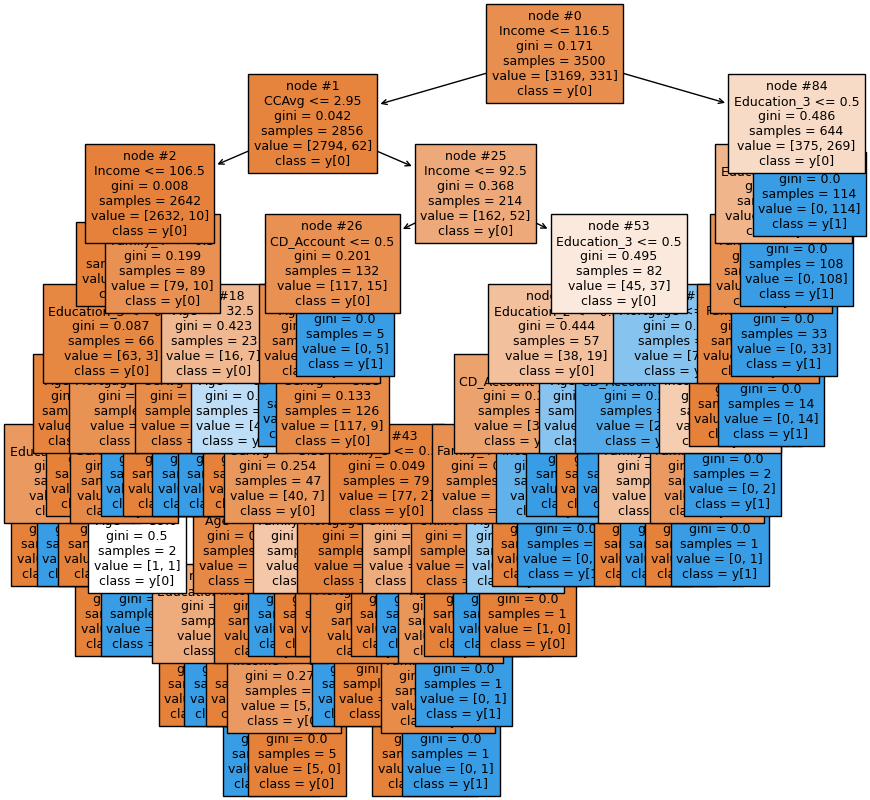

In [ ]:
#Create a list of feature names
feature_names = list(X_train.columns)

#Set the figure size
plt.figure(figsize=(10, 10))
dtree = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)

#This adds arrows to splits in the decision tree in case they are missing
for d in dtree:
    arrow = d.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

In [ ]:
#Print a report that shows the rules of the decision tree
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- Age <= 39.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  39.00
|   |   | 

In [ ]:
#Create feature importance dataframe - index is column names in X_train data; Importance_score is the column
feature_importance = pd.DataFrame(model.feature_importances_, columns=['Importance_Score'], index=X_train.columns)

#Sort values by Importance_Score in descending order
feature_importance.sort_values(by='Importance_Score', ascending=False, inplace=True)

#Print feature_importance dataframe
print(feature_importance)

                    Importance_Score
Income                      0.307294
Education_2                 0.240847
Education_3                 0.165787
Family_3                    0.103121
Family_4                    0.062971
CCAvg                       0.046723
Age                         0.033122
CD_Account                  0.026348
Mortgage                    0.010725
Online                      0.003063
Securities_Account          0.000000
CreditCard                  0.000000
Family_2                    0.000000


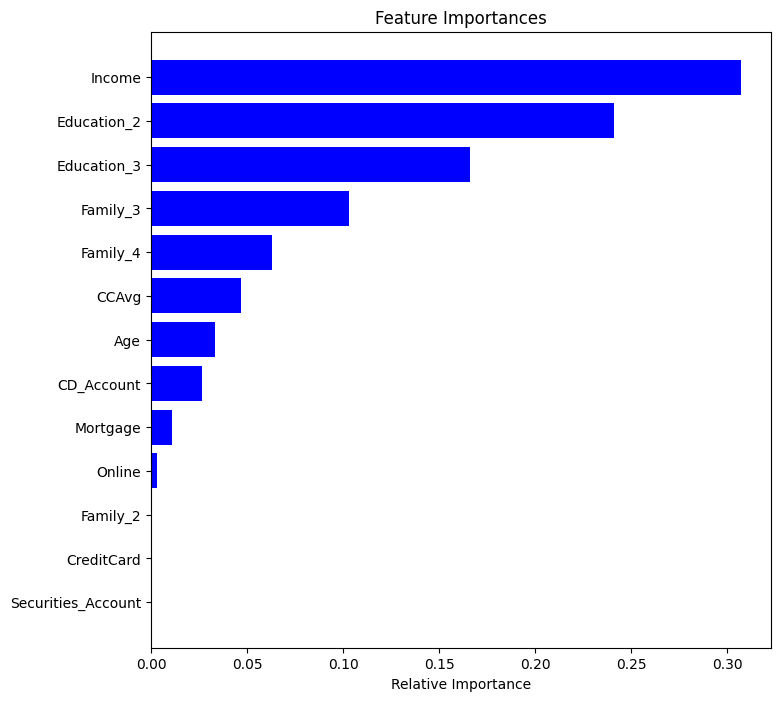

In [ ]:
#Get feature importances and sort indices
importances = model.feature_importances_
indices = np.argsort(importances)

#Get y ticks
y_ticks = [feature_names[i] for i in indices]

#Get indices
index = range(len(indices))

#Set figure size
plt.figure(figsize=(8, 8))

#Plot Feature Importance bar graph
plt.barh(index, importances[indices], color='blue', align='center')

#Include title
plt.title('Feature Importances')

#Label x and y axes
plt.xlabel('Relative Importance')
plt.yticks(index, y_ticks)

plt.show()

###**Observations:**
* Top 5 features that are of most importance:
  * Income - 0.31
  * Education 2 (Graduate Students) - 0.24
  * Education 3 (PhD Students / Working Professionals) - 0.17
  * Family 3 (Families with 3 members) - 0.10
  * Family 4 (Families with 4 members) - 0.06
* The Income and Education 2 features will have a larger effect on predicting whether a customer takes a personal loan
* Results from decision tree rules predict a customer saying "yes" to a personal loan:
  * Customer income is more than $116,500
  * Customer is either a graduate/PhD student or working professional

###Check Model Performance on Test Data

####Confusion Matrix of Testing Data

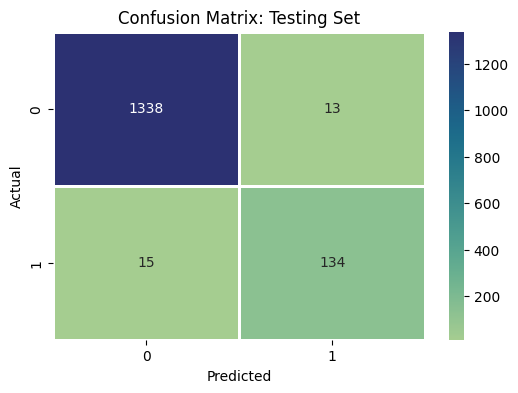

In [ ]:
#Get the predicted y values
y_pred = model.predict(X_test)

#Create the confusion matrix based on the y training and predicted values
cm = confusion_matrix(y_test, y_pred)

#Set figure for heatmap
plt.figure(figsize=(6,4))

#Create heatmap for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', linewidth=1, linecolor='white', cmap='crest')

#Label x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Include title
plt.title('Confusion Matrix: Testing Set')

plt.show()

####Check Model Performance on Testing Data

In [ ]:
#Get predicted y values from X training data
y_pred = model.predict(X_test)

#Get the accuracy, precision, recall, and F1 scores based on training and predicted y values
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Create performance dataframe
testing_performance = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}, index=[0])

#Print performance dataframe
print(testing_performance)

   Accuracy  Precision    Recall        F1
0  0.981333   0.911565  0.899329  0.905405


###**Observations:**
* We have the following results from the testing data report:
  * Accuracy - 98.13%
  * Precision - 91.12%
  * Recall - 89.93%
  * F1 - 90.54%
* Overall, the model appears to be performing very well based on the metrics
* Recall is the metric we like to maximize to reduce false negatives
  * Predicting customers to refuse a personal loan when they actually do results in a loss of opportunity
    * Less revenue for the bank
* Precision is another metric we want to keep in mind when reducing false positives
  * Expecting customers to take out a personal when they are not interested results in wasteful spending
    * No return on marketing/advertisting costs when targeting such customers

### Model Performance Improvement

####Pre-Pruning

In [ ]:
#Choose decision tree as estimator with random state of 1
estimator = DecisionTreeClassifier(random_state=1)

#Define parameter grid
parameters = {"max_depth": np.arange(6, 15), "min_samples_leaf": [1, 2, 5, 7, 10], "max_leaf_nodes": [4, 8, 12, 16, 20]}

#Recall score is used to compare parameter combinations
recall_scorer = make_scorer(recall_score)

#Define the grid search object with 5-fold cross validation
grid = GridSearchCV(estimator, parameters, scoring=recall_scorer, cv=5)

#Fit the grid search object on the X and y training data
grid = grid.fit(X_train, y_train)

# Set the decision tree to the best combination of parameters
estimator = grid.best_estimator_

# Fit the best estimator on the training data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=16, random_state=1)

* Grid Search shows that the best model has the following parameters:
  * Max Depth = 8
  * Max Leaf Nodes = 16

####Check Performance on Training Data


####Confusion Matrix

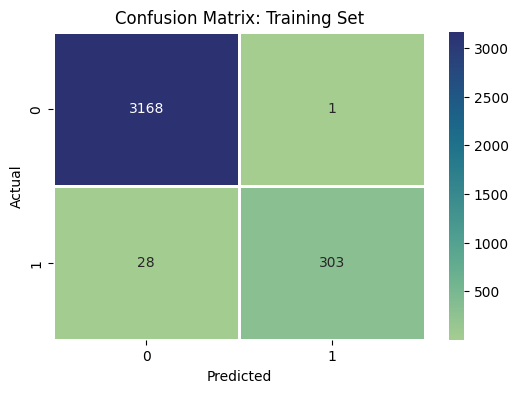

In [ ]:
#Get the predicted y values
y_pred = estimator.predict(X_train)

#Create the confusion matrix based on the y training and predicted values
cm = confusion_matrix(y_train, y_pred)

#Set figure for heatmap
plt.figure(figsize=(6,4))

#Create heatmap for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', linewidth=1, linecolor='white', cmap='crest')

#Label x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Include title
plt.title('Confusion Matrix: Training Set')

plt.show()

#####Performance Report

In [ ]:
#Get predicted y values from X training data
y_pred = estimator.predict(X_train)

#Get the accuracy, precision, recall, and F1 scores based on training and predicted y values
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

#Create performance dataframe
estimator_training_performance = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}, index=[0])

#Print performance dataframe
print(estimator_training_performance)

   Accuracy  Precision    Recall        F1
0  0.991714   0.996711  0.915408  0.954331


###**Observations:**
* Pre-Pruning Results (Training Data):
  * Accuracy - 99.17%
  * Precision - 99.67%
  * Recall - 91.54%
  * F1 - 95.43%
* Accuracy, Precision, and F1 scores improved, though recall had a slight decrease
* We reduced almost all of the false positives, which is good for precision
* However, our goal is to boost the recall and reduce the false negatives
  

###Visualize the Decision Tree

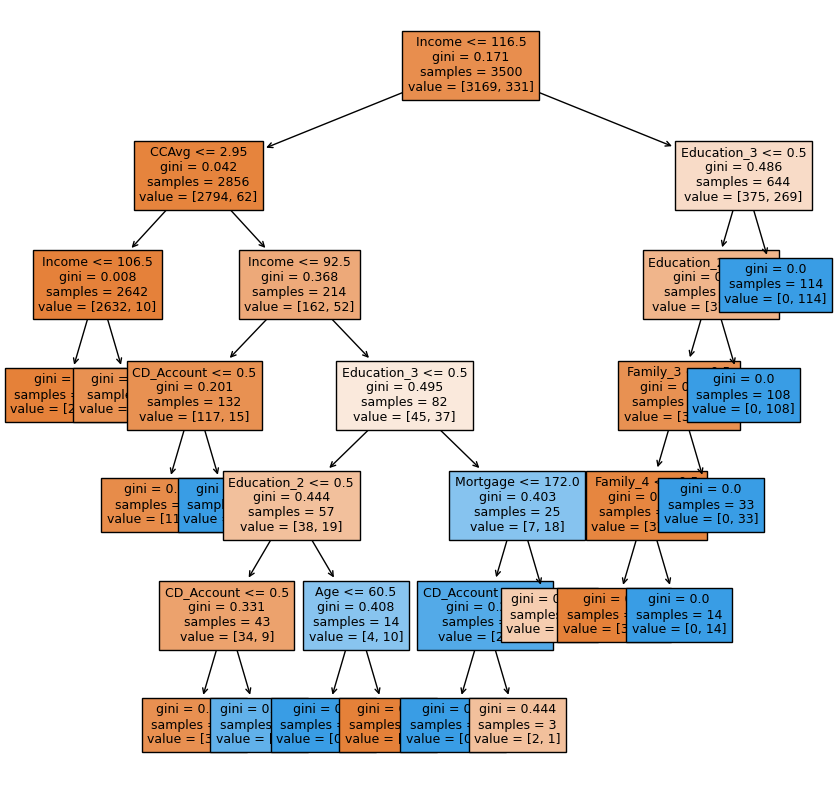

In [ ]:
#Create a list of feature names
feature_names = list(X_train.columns)

#Set the figure size
plt.figure(figsize=(10, 10))
dtree = tree.plot_tree(estimator, feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None)

#This adds arrows to splits in the decision tree in case they are missing
for d in dtree:
    arrow = d.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

In [ ]:
#Print a report that shows the rules of the decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_3 <= 0.50
|   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |--- Age <= 60.50
|   |   |   |   |   |   |--- weights: [0.00, 10.00] class: 1
|   |   |   |   |   |--- Age >  60.50
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |

####Feature Importances

In [ ]:
#Create feature importance dataframe - index is column names in X_train data; Importance_score is the column
feature_importance = pd.DataFrame(estimator.feature_importances_, columns=['Importance_Score'], index=X_train.columns)

#Sort values by Importance_Score in descending order
feature_importance.sort_values(by='Importance_Score', ascending=False, inplace=True)

#Print feature_importance dataframe
print(feature_importance)

                    Importance_Score
Income                      0.324957
Education_2                 0.257032
Education_3                 0.180462
Family_3                    0.102923
Family_4                    0.049137
CCAvg                       0.041241
CD_Account                  0.028749
Age                         0.010402
Mortgage                    0.005098
Securities_Account          0.000000
Online                      0.000000
CreditCard                  0.000000
Family_2                    0.000000


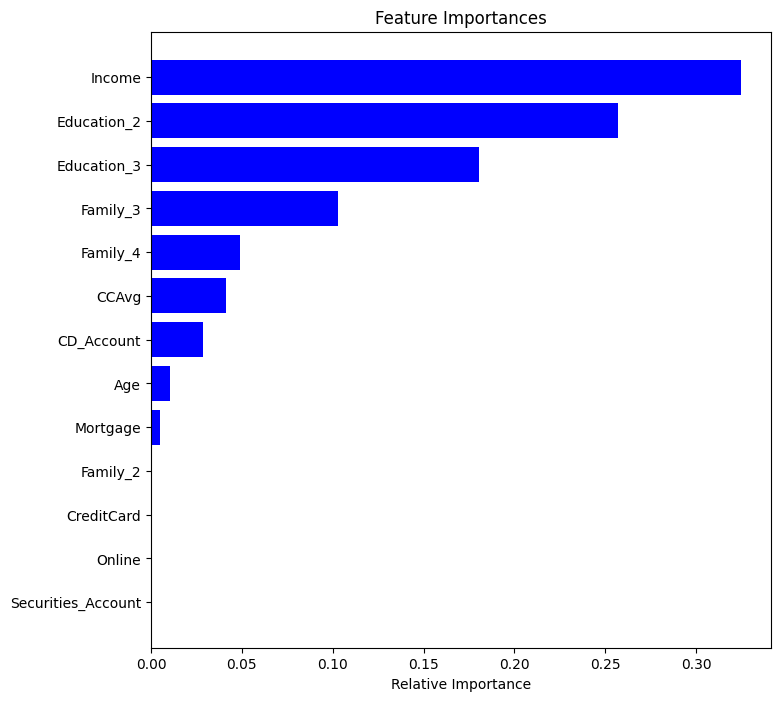

In [ ]:
#Get feature importances and sort indices
importances = estimator.feature_importances_
indices = np.argsort(importances)

#Get y ticks
y_ticks = [feature_names[i] for i in indices]

#Get indices
index = range(len(indices))

#Set figure size
plt.figure(figsize=(8, 8))

#Plot Feature Importance bar graph
plt.barh(index, importances[indices], color='blue', align='center')

#Include title
plt.title('Feature Importances')

#Label x and y axes
plt.xlabel('Relative Importance')
plt.yticks(index, y_ticks)

plt.show()

###**Observations:**
* We see similar results as before with the top 5 features:
  * Income - 0.32
  * Education 2 (Graduate Students) - 0.26
  * Education 3 (PhD Students / Working Professionals) - 0.18
  * Family 3 (Families with 3 members) - 0.10
  * Family 4 (Families with 4 members) - 0.05
* We see a slight increase in scores compared to the original model for all features except Family 3
  * Income -> 0.01 increase
  * Education 2 -> 0.02 increase
  * Education 3 -> 0.01 increase
  * Family 3 -> no increase
  * Family 4 -> 0.01 increase
* Pre-Pruned decision tree predicts a customer will take out a personal based on the following conditions:
  * PhD students or working professionals earning more than \$116,500
  * Customers living in a family of 3 or family 4 with household income over \$116,500

###Confusion Matrix

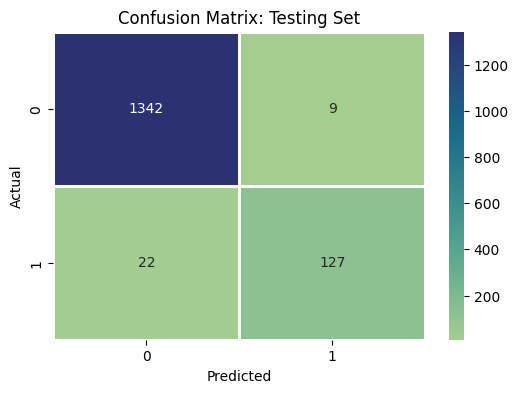

In [ ]:
#Get the predicted y values
y_pred = estimator.predict(X_test)

#Create the confusion matrix based on the y training and predicted values
cm = confusion_matrix(y_test, y_pred)

#Set figure for heatmap
plt.figure(figsize=(6,4))

#Create heatmap for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', linewidth=1, linecolor='white', cmap='crest')

#Label x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Include title
plt.title('Confusion Matrix: Testing Set')

plt.show()

###Check Model Performance on Testing Data

In [ ]:
#Get predicted y values from X training data
y_pred = estimator.predict(X_test)

#Get the accuracy, precision, recall, and F1 scores based on training and predicted y values
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Create performance dataframe
estimator_testing_performance = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}, index=[0])

#Print performance dataframe
print(estimator_testing_performance)

   Accuracy  Precision    Recall        F1
0  0.979333   0.933824  0.852349  0.891228


###**Observations:**
* Pre-Pruning Results (Testing Data):
  * Accuracy - 97.93%
  * Precision - 93.38%
  * Recall - 85.23%
  * F1 - 89.12%
* The estimator did not perform as well on the testing data
  * This may be due to overfitting since the estimator performed better on the training data
* Hopefully we can improve the recall score in the Post-Pruning stage



###Cost-Complexity Pruning

In [ ]:
#Create the model for cost-complexity pruning - gather values for alpha and impurities
clf = DecisionTreeClassifier(class_weight='balanced', random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
#Dataframe showing the values of alpha and their corresponding impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-2.983425e-16
1,3.853725e-19,-2.979571e-16
2,3.853725e-19,-2.975717e-16
3,3.853725e-19,-2.971864e-16
4,5.255079e-19,-2.966609e-16
5,7.006772e-19,-2.959602e-16
6,7.882619e-19,-2.951719e-16
7,7.882619e-19,-2.943837e-16
8,1.261219e-18,-2.931224e-16
9,2.515611e-18,-2.906068e-16


In [ ]:
#Get a list of models and their corresponding alpha values on the training data
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Get the number of nodes on the lasts tree and its corresponding alpha value
last_tree_node_count = clfs[-1].tree_.node_count
last_ccp_alpha = ccp_alphas[-1]

#Print the results
print(f'Number of nodes in last tree: {last_tree_node_count}')
print(f'CCP Alpha: {last_ccp_alpha}')

Number of nodes in last tree: 1
CCP Alpha: 0.2953792759992314


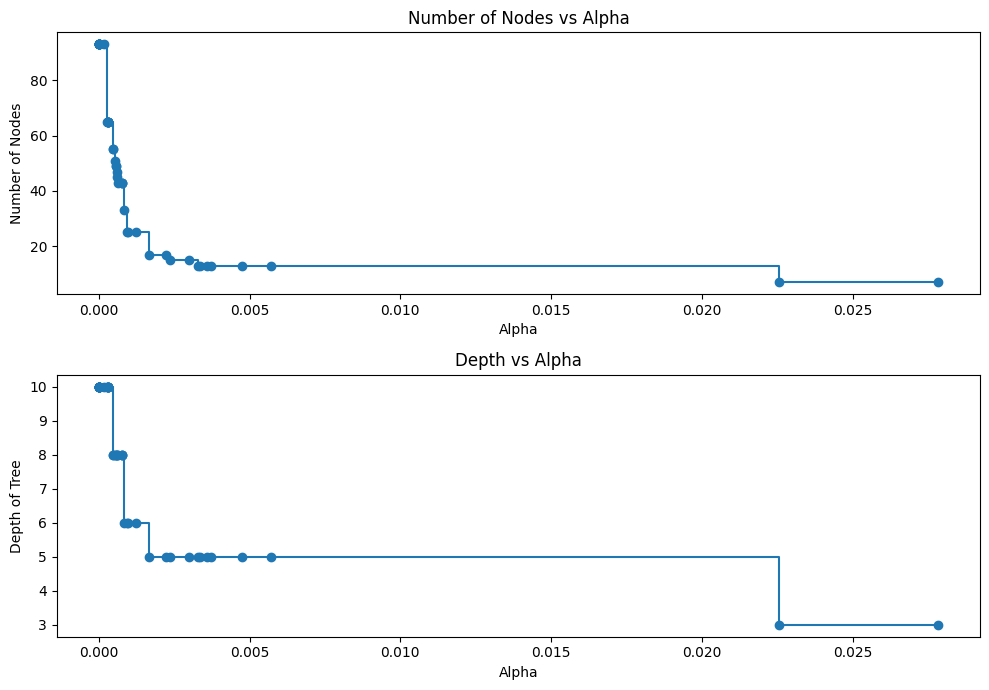

In [ ]:
#List of models and alphas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#Plot Number of Nodes vs. Alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")

#Plot Tree Depth vs. Alpha
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

###Recall vs. Alpha - Training / Testing Sets

In [ ]:
#Get recall values on training data
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

#Get recall values on testing data
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

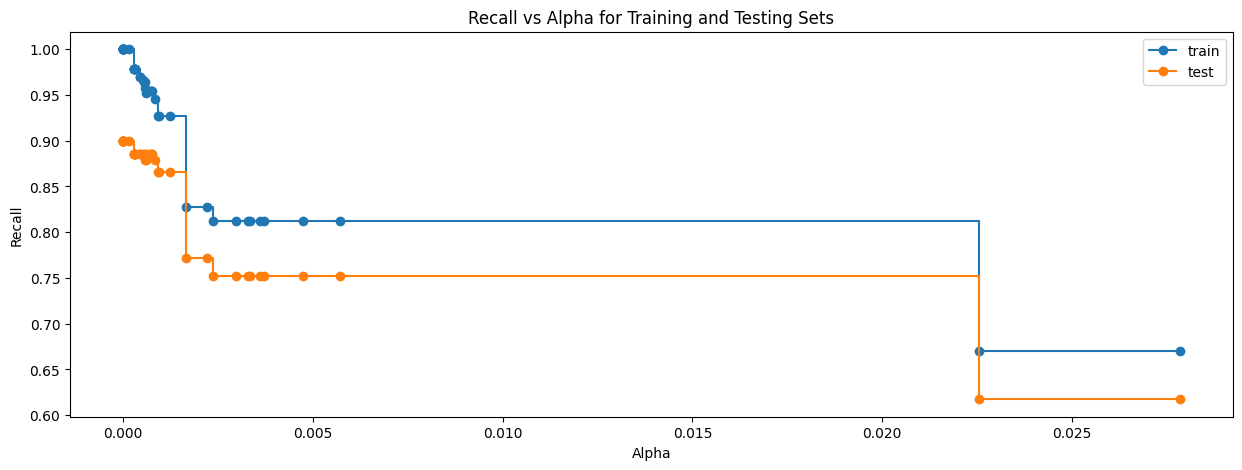

In [ ]:
#Plot Training and Testing graphs - Recall vs. Alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
#Get the model that contains the highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


* Model did not include an alpha value
* Experimented with different alphas between 0 and 0.005:
   * Optimal alpha = 0.0007

In [ ]:
#Define second estimator and balanced class weight
estimator_2 = DecisionTreeClassifier(ccp_alpha=0.0007, class_weight='balanced', random_state=1)

#Fit estimator on X and y training data
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0007, class_weight='balanced',
                       random_state=1)

###Confusion Matrix (Training Data)

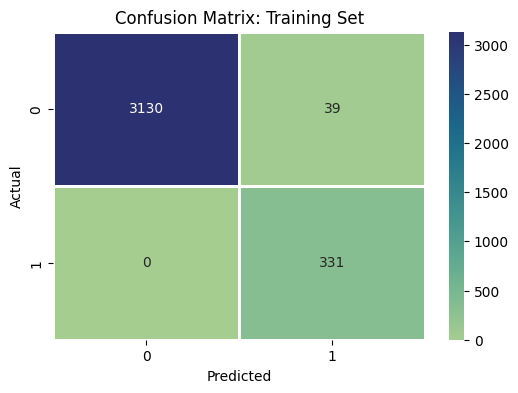

In [ ]:
#Get the predicted y values
y_pred = estimator_2.predict(X_train)

#Create the confusion matrix based on the y training and predicted values
cm = confusion_matrix(y_train, y_pred)

#Set figure for heatmap
plt.figure(figsize=(6,4))

#Create heatmap for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', linewidth=1, linecolor='white', cmap='crest')

#Label x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Include title
plt.title('Confusion Matrix: Training Set')

plt.show()

In [ ]:
#Get predicted y values from X training data
y_pred = estimator_2.predict(X_train)

#Get the accuracy, precision, recall, and F1 scores based on training and predicted y values
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

#Create performance dataframe
estimator2_training_performance = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}, index=[0])

#Print performance dataframe
print(estimator2_training_performance)

   Accuracy  Precision  Recall        F1
0  0.988857   0.894595     1.0  0.944365


###**Observations:**
* Model Performance (Training):
  * Accuracy - 98.89%
  * Precision - 89.46%
  * Recall - 100%
  * F1 - 94.44%
* Recall is great score with 100%
* Accuracy, precision, and F1 scores are decent as well

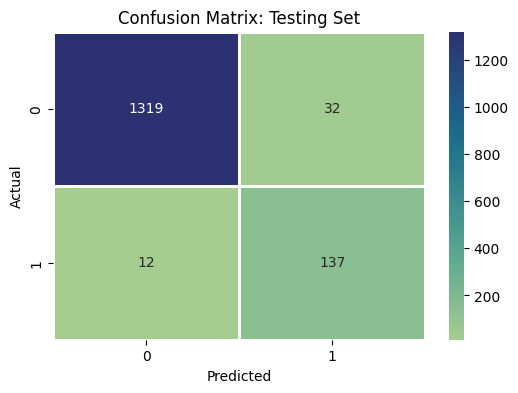

In [ ]:
#Get the predicted y values
y_pred = estimator_2.predict(X_test)

#Create the confusion matrix based on the y training and predicted values
cm = confusion_matrix(y_test, y_pred)

#Set figure for heatmap
plt.figure(figsize=(6,4))

#Create heatmap for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', linewidth=1, linecolor='white', cmap='crest')

#Label x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Include title
plt.title('Confusion Matrix: Testing Set')

plt.show()

In [ ]:
#Get predicted y values from X testing data
y_pred = estimator_2.predict(X_test)

#Get the accuracy, precision, recall, and F1 scores based on training and predicted y values
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#Create performance dataframe
estimator2_testing_performance = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}, index=[0])

#Print performance dataframe
print(estimator2_testing_performance)

   Accuracy  Precision    Recall        F1
0  0.970667   0.810651  0.919463  0.861635


###**Observations:**
* Model Performance (Testing):
  * Accuracy - 97.07%
  * Precision - 81.07%
  * Recall - 91.95%
  * F1 - 86.16%
* Overall, the recall improved compared to the original and pre-pruned models in testing
  * The goal of reducing the false negatives has been achieved
* Accuracy, Precision, and F1 scores are lower than the training, but still performed well

###Feature Importances

In [ ]:
#Create feature importance dataframe - index is column names in X_train data; Importance_score is the column
feature_importance = pd.DataFrame(estimator_2.feature_importances_, columns=['Importance_Score'], index=X_train.columns)

#Sort values by Importance_Score in descending order
feature_importance.sort_values(by='Importance_Score', ascending=False, inplace=True)

#Print feature_importance dataframe
print(feature_importance)

                    Importance_Score
Income                      0.644746
CCAvg                       0.095460
Family_4                    0.083394
Education_2                 0.064834
Family_3                    0.062661
Education_3                 0.021632
Mortgage                    0.012933
CD_Account                  0.007632
Age                         0.004811
Securities_Account          0.001897
Online                      0.000000
CreditCard                  0.000000
Family_2                    0.000000


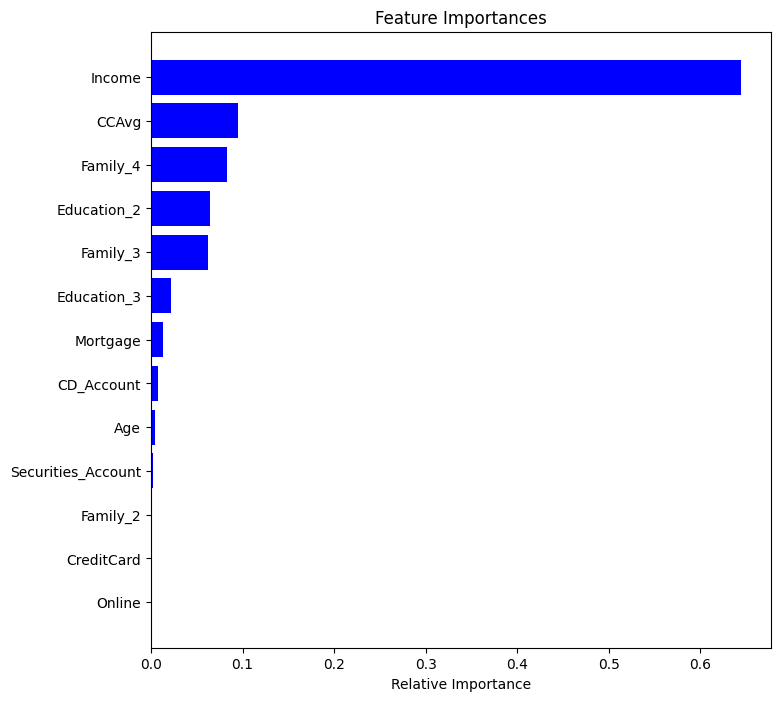

In [ ]:
#Get feature importances and sort indices
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

#Get y ticks
y_ticks = [feature_names[i] for i in indices]

#Get indices
index = range(len(indices))

#Set figure size
plt.figure(figsize=(8, 8))

#Plot Feature Importance bar graph
plt.barh(index, importances[indices], color='blue', align='center')

#Include title
plt.title('Feature Importances')

#Label x and y axes
plt.xlabel('Relative Importance')
plt.yticks(index, y_ticks)

plt.show()

###**Observations:**
* Top 4 features of importance:
  * Income - 0.64
  * CCAvg - 0.10
  * Family 4  - 0.08
  * Education 2 - 0.06
* Income is the dominant feature that has largest effect on predicting who will take a personal loan
* Education level, family size, and average monthly credit card spending also play a role in the predictions



###Visualize the Decision Tree

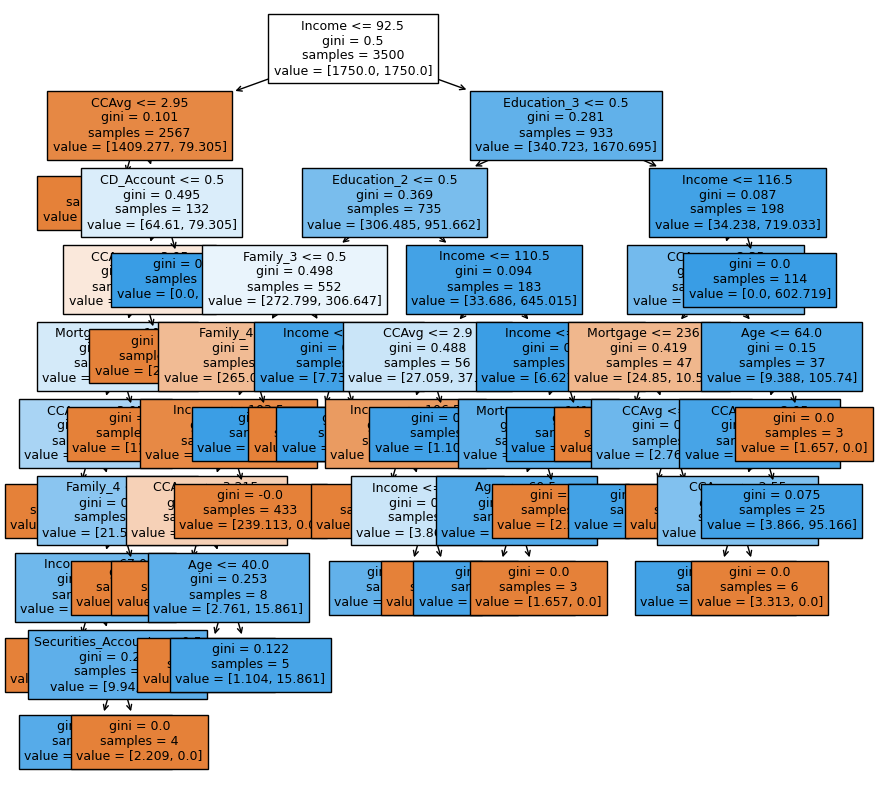

In [ ]:
#Create a list of feature names
feature_names = list(X_train.columns)

#Set the figure size
plt.figure(figsize=(10, 10))
dtree = tree.plot_tree(estimator_2, feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None)

#This adds arrows to splits in the decision tree in case they are missing
for d in dtree:
    arrow = d.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

plt.show()

In [ ]:
#Print a report that shows the rules of the decision tree
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |   |   |--- weights: [4.42, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [7.73, 52.87] class: 1
|   |   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [2.21, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [7.18, 0.00] class: 0
|   |   |   |   |--- Mortgage >  102.50
|   |   | 

###**Observations:**
* Post-Pruned Model predicts a customer will take out a personal loan based on the following conditions:
  * Customers who live with a family of 4 with a household income more than \$92,500
  * PhD students/Working professionals who:
    * Earn between \$92,500 and \$116,500 and
    * Have mortgage over \$236,00 and
    * Spend less than an average of \$1,250 a month on credit cards
  * PhD students/Working professionals who earn more than \$116,500
  * Graduate students who earn between \$92,500 and \$106,500 and spend more than \$2,900 a month
  * Customers who live with a family of 3 with a household income over $108,500

## Model Comparison and Final Model Selection

In [ ]:
#Create model comparison dataframe by concatenating all the training/testing results of each model
model_comparison_df = pd.concat([training_performance, testing_performance, estimator_training_performance, estimator_testing_performance, estimator2_training_performance, estimator2_testing_performance])

#Set index to label model names and training/testing stages
model_comparison_df.index = ['Tree Training', 'Tree Testing', 'Pre-Pruning Training', 'Pre-Pruning Testing', 'Post-Pruning Training', 'Post-Pruning Testing']

#Transpose dataframe
model_comparison_df.T

,Tree Training,Tree Testing,Pre-Pruning Training,Pre-Pruning Testing,Post-Pruning Training,Post-Pruning Testing
Accuracy,1.0,0.981333,0.991714,0.979333,0.988857,0.970667
Precision,1.0,0.911565,0.996711,0.933824,0.894595,0.810651
Recall,1.0,0.899329,0.915408,0.852349,1.000000,0.919463
F1,1.0,0.905405,0.954331,0.891228,0.944365,0.861635


###**Observations:**
* There are a few items to consider when selecting the best model:
  * Accuracy Metrics - accuracy, precision, recall, and F1 scores
  * Metric Optimization - for personal loan campaign, we want to maximize recall
  * Computational Efficiency - Pre-Pruning vs. Post-Pruning Trees
    * Pre-pruned models are less computationally expensive than post-pruned models since trees do not grow fully
    * Post-pruned models usually perform better and easier to interpret than pre-pruned models
* Overall, the three models (original tree, pre-pruned tree, and post-pruned tree) performed well on all metrics

###**Model Decision:**
* The data science team has decided to go with the post-pruned model for these reasons:
  * Post-pruned model has the strongest recall of about 92% on testing data
  * The model has other strong metrics:
    * Accuracy: 98% training set; 97% testing set
      * This is comparable to the other two models at either 99% or 97%
    * F1: 94% training set; 86% testing set
      * Striking a good balance between precision and recall

###Customer Base Analysis

In [ ]:
#Filter loan dataframe for customers who have a family of 3 or 4 members, have have upper middle class to upper class income levels, and are liability customers
liability_target_customers = loan[(loan['Family'].isin([3,4])) & (loan['Income_Class'].isin(['Upper Middle Class', 'Upper Class'])) & (loan['Personal_Loan']==0)]

#Find total number of customers who fit this criteria
liability_target_customers.shape[0]

134

In [ ]:
#Get number of liability customers by geographical region
geo_group = liability_target_customers.groupby(['Geographical_Region'])['ID'].count().reset_index()
geo_group.rename(columns={'ID':'Customer_Count'}, inplace=True)

geo_group

,Geographical_Region,Customer_Count
0,Greater Los Angeles Area,26
1,Nevada / Eastern California,5
2,San Francisco Bay Area,35
3,San Francisco Bay Area / Central Valley / Nort...,22
4,San Francisco Bay Area / Northern California,28
5,Southern California,18


In [ ]:
#Get number of liability customers by family size
family_group = liability_target_customers.groupby(['Family'])['ID'].count().reset_index()
family_group.rename(columns={'ID':'Customer_Count'}, inplace=True)

family_group

,Family,Customer_Count
0,3,60
1,4,74


In [ ]:
#Get number of liability customers by level of education
education_group = liability_target_customers.groupby(['Education'])['ID'].count().reset_index()
education_group.rename(columns={'ID':'Customer_Count'}, inplace=True)

education_group

,Education,Customer_Count
0,1,37
1,2,50
2,3,47


In [ ]:
#Get a breakdown of credit card average spending per month for these customers
cc_avg_group = liability_target_customers['CCAvg'].value_counts(normalize=True).sort_index().reset_index()

#Lower spending
low_spend = cc_avg_group.iloc[0:9]['proportion'].sum()

#Higher spending
high_spend = cc_avg_group.iloc[9:22]['proportion'].sum()

print('Lower Spending Percentage:', round(low_spend*100, 2), '%')
print('Higher Spending Percentage:', round(high_spend*100, 2), '%')


Lower Spending Percentage: 37.31 %
Higher Spending Percentage: 62.69 %


In [ ]:
#Get value counts of each age group
age_group = liability_target_customers['Age_Group'].value_counts(normalize=True).sort_index().reset_index()

age_group

,Age_Group,proportion
0,20-29,0.194030
1,30-39,0.208955
2,40-49,0.231343
3,50-59,0.126866
4,60-69,0.238806


In [ ]:
#Create a dataframe for each of the age groups
twenties = liability_target_customers[liability_target_customers['Age_Group']=='20-29']
thirties = liability_target_customers[liability_target_customers['Age_Group']=='30-39']
forties = liability_target_customers[liability_target_customers['Age_Group']=='40-49']
fifties = liability_target_customers[liability_target_customers['Age_Group']=='50-59']
sixties = liability_target_customers[liability_target_customers['Age_Group']=='60-69']

In [ ]:
#Get value counts by geographical region for customers in their 20s
twenties['Geographical_Region'].value_counts(normalize=True)

Geographical_Region
San Francisco Bay Area                                           0.461538
Greater Los Angeles Area                                         0.192308
San Francisco Bay Area / Northern California                     0.115385
San Francisco Bay Area / Central Valley / Northern California    0.115385
Southern California                                              0.115385
Name: proportion, dtype: float64

In [ ]:
#Get value counts by geographical region for customers in their 30s
thirties['Geographical_Region'].value_counts(normalize=True)

Geographical_Region
Greater Los Angeles Area                                         0.285714
San Francisco Bay Area / Northern California                     0.250000
Southern California                                              0.214286
San Francisco Bay Area                                           0.142857
San Francisco Bay Area / Central Valley / Northern California    0.107143
Name: proportion, dtype: float64

In [ ]:
#Get value counts by geographical region for customers in their 40s
forties['Geographical_Region'].value_counts(normalize=True)

Geographical_Region
San Francisco Bay Area                                           0.258065
San Francisco Bay Area / Northern California                     0.225806
Greater Los Angeles Area                                         0.193548
Southern California                                              0.161290
San Francisco Bay Area / Central Valley / Northern California    0.129032
Nevada / Eastern California                                      0.032258
Name: proportion, dtype: float64

In [ ]:
#Get value counts by geographical region for customers in their 50s
fifties['Geographical_Region'].value_counts(normalize=True)

Geographical_Region
San Francisco Bay Area / Northern California                     0.294118
San Francisco Bay Area                                           0.235294
San Francisco Bay Area / Central Valley / Northern California    0.176471
Greater Los Angeles Area                                         0.176471
Nevada / Eastern California                                      0.058824
Southern California                                              0.058824
Name: proportion, dtype: float64

In [ ]:
#Get value counts by geographical region for customers in their 60s
sixties['Geographical_Region'].value_counts(normalize=True)

Geographical_Region
San Francisco Bay Area / Central Valley / Northern California    0.28125
San Francisco Bay Area                                           0.21875
San Francisco Bay Area / Northern California                     0.18750
Greater Los Angeles Area                                         0.12500
Southern California                                              0.09375
Nevada / Eastern California                                      0.09375
Name: proportion, dtype: float64

###**Observations:**
* 134 liability customers have the following attributes:
  * Upper Middle Class to Upper Class Income Levels
  * Family size of 3 or 4 members
* They live in the following geographical areas:
  * San Francisco Bay Area / Central Valley / Northern California - 63.4%
  * Southern California / Greater Los Angeles Area - 32.8%
  * Eastern California / Nevada - 3.8%
* Family Size Breakdown:
  * Family of 3 members: 44.8%
  * Family of 4 members: 55.2%
* Education Level Breakdown:
  * Undergraduate Students: 27.6%
  * Graduate Students: 37.3%
  * PhD Students / Working Professionals: 35.1%
* Credit Card Average Spending:
  * 63% of the liability customers spend at least \$1,700 or more a month on credit cards
  * 37% of the remaining liability customers spend between \$100 and \$1,600 a month on credit cards
* Age Group Breakdown:
  * Over 40% of the customers are in their 40s or 60s
  * By Geographical Region:
    * San Francisco Bay Area: (percent of 134 customers for each age group)
      * 20s - 46%
      * 30s - 14%
      * 40s - 26%
      * 50s - 24%
      * 60s - 28%
    * Southern California / Greater Los Angeles Area: (percent of 134 customers for each age group)
      * 20s - 31%
      * 30s - 50%
      * 40s - 35%
      * 50s - 23%
      * 60s - 21%
    * We can see that many of these customers in all age groups (around 50% or greater) live in:
      * San Francisco Bay Area or Southern California / Greater Los Angeles Area
    * These areas would be ideal to target liability customers for our initial campaign

## Actionable Insights and Business Recommendations


###**EDA Summary:**

Loan Modeling dataset statistics/observations:
* 5,000 rows (customers) and 14 columns
* No missing values in the data
* Age and Experience are highly correlated
* Mortgage and Income had a moderate to strong correlation
* Feature engineering was performed on columns such as:
   * ZIPCode - extracting first two digits to assist in identifying geographical region for each customer
   * Age - segmenting customers into age groups (20s, 30s, 40s, 50s, and 60s)
   * Income - segmenting customers by income level (lower, middle, upper classes)
* Dummy variables were utilized on categorical features to prepare model building:
  * Education
  * Family
* Outliers were detected on numerical features such as:
  * Income
  * CCAvg
  * Mortgage
  *Investigation of these outliers showed their values to be reasonable
  *Consequently, no outliers were treated and remained in the dataset
* Unbalanced Dataset - About 90% are liability customers while only 10% are asset customers

###**Model Methodology: Decision Tree Classifier (supervised technique)**

* Three decision tree based models were trained and tested on the Loan Modeling dataset
  * Original Decision Tree
  * Pre-Pruned Decision Tree
  * Post-Pruned Decision Tree
* Feature Names:
 * Age
 * Mortgage
 * Income
 * CCAvg
 * Family
 * Education
 * Securities_Account
 * CD_Account
 * Online
 * CreditCard
* Target = Personal Loan: Class 0 = "Non-Loan Buyers"; Class 1 = "Loan Buyers"
* 70% of the data was trained and 30% of the data was tested
* None of the features were scaled
* Objective was to maximize recall
  * Accurately predict the customers who want to purchase a loan
* We also want to consider precision as well
  * Reduce incorrect loan buying predictions for customers who are not interested
* F1 score is also important
  * Balance precision and recall
  * Maximize revenue from loan purchases
  * Minimize loss on marketing/advertising costs


###**Decision Tree Results: (Selected Model = Post-Pruned)**
* Important features that drove prediction of which customers will buy a loan: (highest to lowest)
  * Income
 *  CCAvg
  * Family_4 (family of 4 members)
  * Education_2 (graduate students)
  * Family_3 (family of 3 members)
  * Education_3 (PhD students / working professionals)
* Based on the decision tree print out we see the following segments of customers who want a loan:
  * People with a household income greater than \$92,500 living with a family of 4 people
  * PhD students and working professionals who:
    * Earn between \$92,500 and \$116,500
    * Have a mortgage over \$236,000
    * Spend less than \$1,200/month on credit cards
  * Graduate students who:
    * Earn between \$92,500 and \$106,500
    * Average spending of more than \$2,900 a month on credit cards
  * Customers who:
    * Have a household income more than $108,500
    * Live with a family of 3 people

###**Questions to Consider:**

* Which segments of customers do we target more in our campaign?
* Where do these customers reside?

##**Recommendations:**

* There are certain factors that help us determine which customers we should target for our campaign
  * Important Features:
    * Income
    * Family Size
    * Monthly Credit Card Spending
    * Education Level
  * Decision Tree Report:
    * Identify conditions based on the above features that predict a customer to buy a loan
  * Customer Base Analysis:
    * Use attributes from decision tree results and find number of customers in:
      * Geographical Region
      * Family Size
      * Education Level
      * Monthly Average Credit Card Spending
    * May want to consider age groups as well, though not a feature of high importance
* We can segment the targeted customers into the following groups:
  * Gold Customers: (High Priority)
    * PhD Students / Working Professionals
    * High Income / High Credit Card Spending
    * Family of 3 or 4 members
  * Silver Customers: (Medium Priority)
    * Graduate Students
    * Middle Class Income / Medium Credit Card Spending
    * Family of 3 or 4 members
  * Bronze Customers: (Low Priority)
    * Undergraduate Students
    * Lower Income / Low Credit Card Spending
    * Family of 3 or 4 members
* We can initiate a marketing/advertising campaign to target Gold customers in these locations:
  *  San Francisco Bay Area
  *  Northern California
* Next, we can target Gold customers in the Southern California / Greater Los Angeles Area
* Finally, we can wrap up the Gold campaign in Eastern California and Nevada
* Set up a meeting with the marketing team to establish:
  * Budget
  * Timeline
  * Advertising Strategies
* If Gold campaign is successful, then we can proceed to the Silver and Bronze groups
  * Otherwise, we may have to take following course of action:
    * Refine decision tree model - increase recall and precision scores
    * Use decision tree rules from refined model to determine target customers for a later campaign